# Games

I. General Information. Interim conclusions.


II. Data preprocessing. Interim conclusions.

* Columns heading editing.
* Missing values processing.
* Changing the data type.
* Duplicates processing.
* Categorical data processing.
* Numerical data processing.
    

III. Exploratory Data Analysis (EDA).

* Releases by year, sales by platform.
* Identification of the actual period.
* Sales by platform for the selected period.
* Users and critical reception.
* Search for potentially profitable genres.
* Interim conclusions.
    
    
IV. User portrait by region.

* Analysis of popular platforms.
* Analysis of popular genres.
* Impact of ESRB rating.
* Interim conclusions.
    

V. Hypothesis testing.

* Hypothesis of equality of user ratings for Xbox One and PC platforms.
* Hypothesis of inequality of user ratings for Action and Sports genres.
* Interim conclusions.
    

VI. General conclusion.

In [1]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import stats as st

In [2]:
# reading the files and saving it to the data variable
pth1 = '/home/yuso/jupyter_dir/jupyter_env/datasets/games.csv'
pth2 = '/datasets/games.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [3]:
# custom function for primary data analysis 
def get_info(df):
    percentiles= [.20, .40, .60, .80]
    include=['object', 'float', 'int']
    print(f'\033[0;37;40m Total number of rows: \033[0;0m {df.shape[0]} rows\n \n\033[0;37;40m Total number of columns: \033[0;0m {df.shape[1]} columns\n')
    print('\033[4;37;40m GENERAL INFORMATION \033[0;0m')
    print(df.info(memory_usage='deep'))
    print('\n\033[0;37;40m Top 5 rows: \033[0;0m')
    display(df.head())
    print('\n\033[0;37;40m Last 5 rows: \033[0;0m')
    display(df.tail())
    print('\n\033[0;37;40m Missing values ratio: \033[0;0m')
    print(round(df.isnull().mean() * 100, 2))
    print('\n\033[2;37;40m Duplicates ratio \033[0;0m', '  ', round(df.duplicated().mean() * 100, 2), ' %')
    print('\n\033[0;37;40m Numerical and categorical data summary: \033[0;0m')
    display(pd.DataFrame(df.describe(percentiles = percentiles, include = include).T))

In [4]:
# primary data analysis 
get_info(data)

 Total number of rows:  16715 rows
 
 Total number of columns:  11 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 5.6 MB
None

 Top 5 rows: 


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



 Last 5 rows: 


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN



 Missing values ratio: 
Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
Name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,16446.0,NaN,NaN,NaN,2006.484616,5.87705,1980.0,2002.0,2006.0,2007.0,2009.0,2011.0,2016.0
Genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_sales,16715.0,NaN,NaN,NaN,0.263377,0.813604,0.0,0.0,0.04,0.08,0.12,0.31,41.36
EU_sales,16715.0,NaN,NaN,NaN,0.14506,0.503339,0.0,0.0,0.01,0.02,0.04,0.15,28.96
JP_sales,16715.0,NaN,NaN,NaN,0.077617,0.308853,0.0,0.0,0.0,0.0,0.0,0.06,10.22
Other_sales,16715.0,NaN,NaN,NaN,0.047342,0.186731,0.0,0.0,0.01,0.01,0.01,0.05,10.57
Critic_Score,8137.0,NaN,NaN,NaN,68.967679,13.938165,13.0,58.0,67.0,71.0,74.0,81.0,98.0
User_Score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**According to the documentation:**

- `Name`
- `Platform`
- `Year_of_Release`
- `Genre`
- `NA_sales —` North American sales in USD million;
- `EU_sales` — sales in Europe in USD million;
- `JP_sales` — sales in Japan in USD million;
- `Other_sales —` sales in other countries in USD million;
- `Critic_Score` — maximum of 100;
- `User_Score` — maximum of 10;
- `Rating` — ESRB (Entertainment Software Rating Board).  

Data for 2016 may be incomplete.

**Brief data analysis:**

* column headers issues - lower and upper case combination;
* lower and upper case combination in text data (name, genre, platform);
* missing values:
    - `Name` - 0.01%;
    - `Year_of_Release` - 1.61%;
    - `Genre` - 0.01%;
    - `Critic_Score` - 51.32%;
    - `User_Score` - 40.09%;
    - `Rating` - 40.48%;
* data types mismatching: `Year_of_Release` - float64 (required int), `User_Score` - object (required float64);
* `User_Score` column - the most common value - "tbd" (to be determined) - means no evaluation at the time of data collection;
* no explicit duplicates in the data;

## Interim conclusions

According to the data, we have records of 16,715 games released between 1980 and 2016.

- unique platforms - 31 (most common - PS2 - 2161 records);
- unique genres 12 (most common - Action - 3369 records);
- average critics' score is 68/100, users' average is not yet available;
- most frequent game rating - E (3990 records);
- average sales are highest in NA (0.26 million), followed by Europe (0.14 million) and Japan (0.07 million), the standard deviation is also highest for America (0.81, i.e. there is a large variation);


It can be argued that currently available data is sufficient for the task. But this data needs to be processed: we need to change the data type and column headings, process missing values, evaluate the distribution, check text data for implicit duplicates (transform to lowercase).

# Data preprocessing

## Columns heading editing

In [5]:
# transworm to lowercase
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Let's delete missing values in columns with a low ratio of them:  

- `Name` - 0.01%;
- `Year_of_Release` - 1.61%;
- `Genre` - 0.01%;

We cannot delete or fill in any values (this will distort the data) in columns with high ratio of missing values: `Critic_Score` - 51.32%, `User_Score` - 40.09%, `Rating` - 40.48%. "Tbd" (that means no evaluation) in the `User_Score` we'll replace with NaN, to transform the data to the requrired type. The missing values in the `Rating` column will be replaced with the `unknown`.       

Possible reasons of missing values: empty records in `Name`, `Year_of_Release` and `Genre` columns can be considered as data collection errors, missing values in critics' scores as absence of reviews for a particular game, in users' scores as insufficient data (tbd value) or as no survey was conducted. Missing values in the `Rating` are due to the specifics of the organization by their assessment: Entertainment Software Rating Board (ESRB) - a non-governmental organization, its main activity is the adoption and rating of video games and other entertainment software in the United States and Canada. Companies are not required to provide a rating before official sales, as game content may change significantly during development. The second option of having an empty ratging records is that the assessment was made by some other organization.

In [6]:
# removal NaN in first type columns
data = data.dropna(subset=['name', 'year_of_release', 'genre'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [7]:
# tbd ratio in the `user_score` column
print("{:.2f}".format(len(data[data['user_score'] == 'tbd']) / data.shape[0]))

0.14


With 40% of NaN, we have another 14% of rows with also missing user scores.

In [8]:
# replacing `tbd` rows with NaN and check
data['user_score'] = data['user_score'].replace('tbd', np.nan)
print('Total missing values ratio:', 
      round(data['user_score'].isnull().mean() * 100, 2), '%')

Total missing values ratio: 54.62 %


In [9]:
# replacing NaN in the `rating` column 
data['rating'] = data['rating'].fillna('unknown') 

## Changing the data type

In [10]:
# transform to required formats
data = data.astype({'year_of_release':'int','user_score':'float'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


## Duplicates processing

There are no explicit duplicates in the data, implicit duplicates will be removed with the `lower()` method (for text data).

In [11]:
# transform to the lowercase
to_lowercase = ['name', 'platform', 'genre', 'rating']
data = data.apply(lambda x: x.str.lower() if x.name in to_lowercase else x)
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6428,a.c.e.: another century's episode r,ps3,2010,simulation,0.00,0.00,0.26,0.00,NaN,NaN,unknown
1700,disney sing it,wii,2008,misc,0.77,0.31,0.00,0.11,NaN,NaN,e
7785,final fantasy xi,x360,2006,role-playing,0.17,0.01,0.00,0.01,66.0,6.5,t
16263,wallace & gromit: curse of the were-rabbit,xb,2005,adventure,0.01,0.00,0.00,0.00,NaN,NaN,unknown
14388,overlord ii,pc,2009,action,0.00,0.03,0.00,0.00,79.0,8.1,t


## Categorical data processing

In this section let's look at the unique values of text data and features distribution: `platform`, `genre`, `rating`.

In [12]:
# duplicates check
print('Duplicates sum in game titles:', data['name'].duplicated().sum())
pd.concat(name for _, name in data.groupby('name') if len(name) > 1).head(10)

Duplicates sum in game titles: 5018


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3358,frozen: olaf's quest,3ds,2013,platform,0.27,0.27,0.00,0.05,NaN,NaN,unknown
3862,frozen: olaf's quest,ds,2013,platform,0.21,0.26,0.00,0.04,NaN,NaN,unknown
1285,007: quantum of solace,x360,2008,action,0.82,0.51,0.01,0.14,65.0,7.1,t
1785,007: quantum of solace,ps3,2008,action,0.43,0.51,0.02,0.19,65.0,6.6,t
3120,007: quantum of solace,wii,2008,action,0.29,0.28,0.01,0.07,54.0,7.5,t
4475,007: quantum of solace,ps2,2008,action,0.17,0.00,0.00,0.26,NaN,NaN,unknown
9507,007: quantum of solace,ds,2008,action,0.11,0.01,0.00,0.01,65.0,NaN,t
14658,007: quantum of solace,pc,2008,action,0.01,0.01,0.00,0.00,70.0,6.3,t
1204,007: the world is not enough,n64,2000,action,1.13,0.38,0.02,0.03,NaN,NaN,unknown
2243,007: the world is not enough,ps,2000,action,0.51,0.35,0.00,0.06,61.0,6.7,t


Duplications in game titles are due to release on various platforms.

In [13]:
# unique values distribution
for column in data.drop('name', axis=1).select_dtypes(include='object'):
    print(
        f'\n\033[0;37;40m_____________UNIQUE VALUES IN:  {column.upper()}_____________\033[0;0m\n')
    print(
        data[column].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')


_____________UNIQUE VALUES IN:  PLATFORM_____________

ps2     12.9%
ds      12.9%
ps3      7.9%
wii      7.8%
x360     7.5%
psp      7.3%
ps       7.2%
pc       5.8%
gba      4.9%
xb       4.9%
gc       3.3%
3ds      3.1%
psv      2.6%
ps4      2.4%
n64      1.9%
xone     1.5%
snes     1.5%
sat      1.1%
wiiu     0.9%
2600     0.7%
nes      0.6%
gb       0.6%
dc       0.3%
gen      0.2%
ng       0.1%
scd      0.0%
ws       0.0%
3do      0.0%
tg16     0.0%
gg       0.0%
pcfx     0.0%
Name: platform, dtype: object

_____________UNIQUE VALUES IN:  GENRE_____________

action          20.1%
sports          14.0%
misc            10.5%
role-playing     9.0%
shooter          7.9%
adventure        7.9%
racing           7.5%
platform         5.3%
simulation       5.2%
fighting         5.1%
strategy         4.1%
puzzle           3.5%
Name: genre, dtype: object

_____________UNIQUE VALUES IN:  RATING_____________

unknown    40.6%
e          23.8%
t          17.7%
m           9.3%
e10+        8.

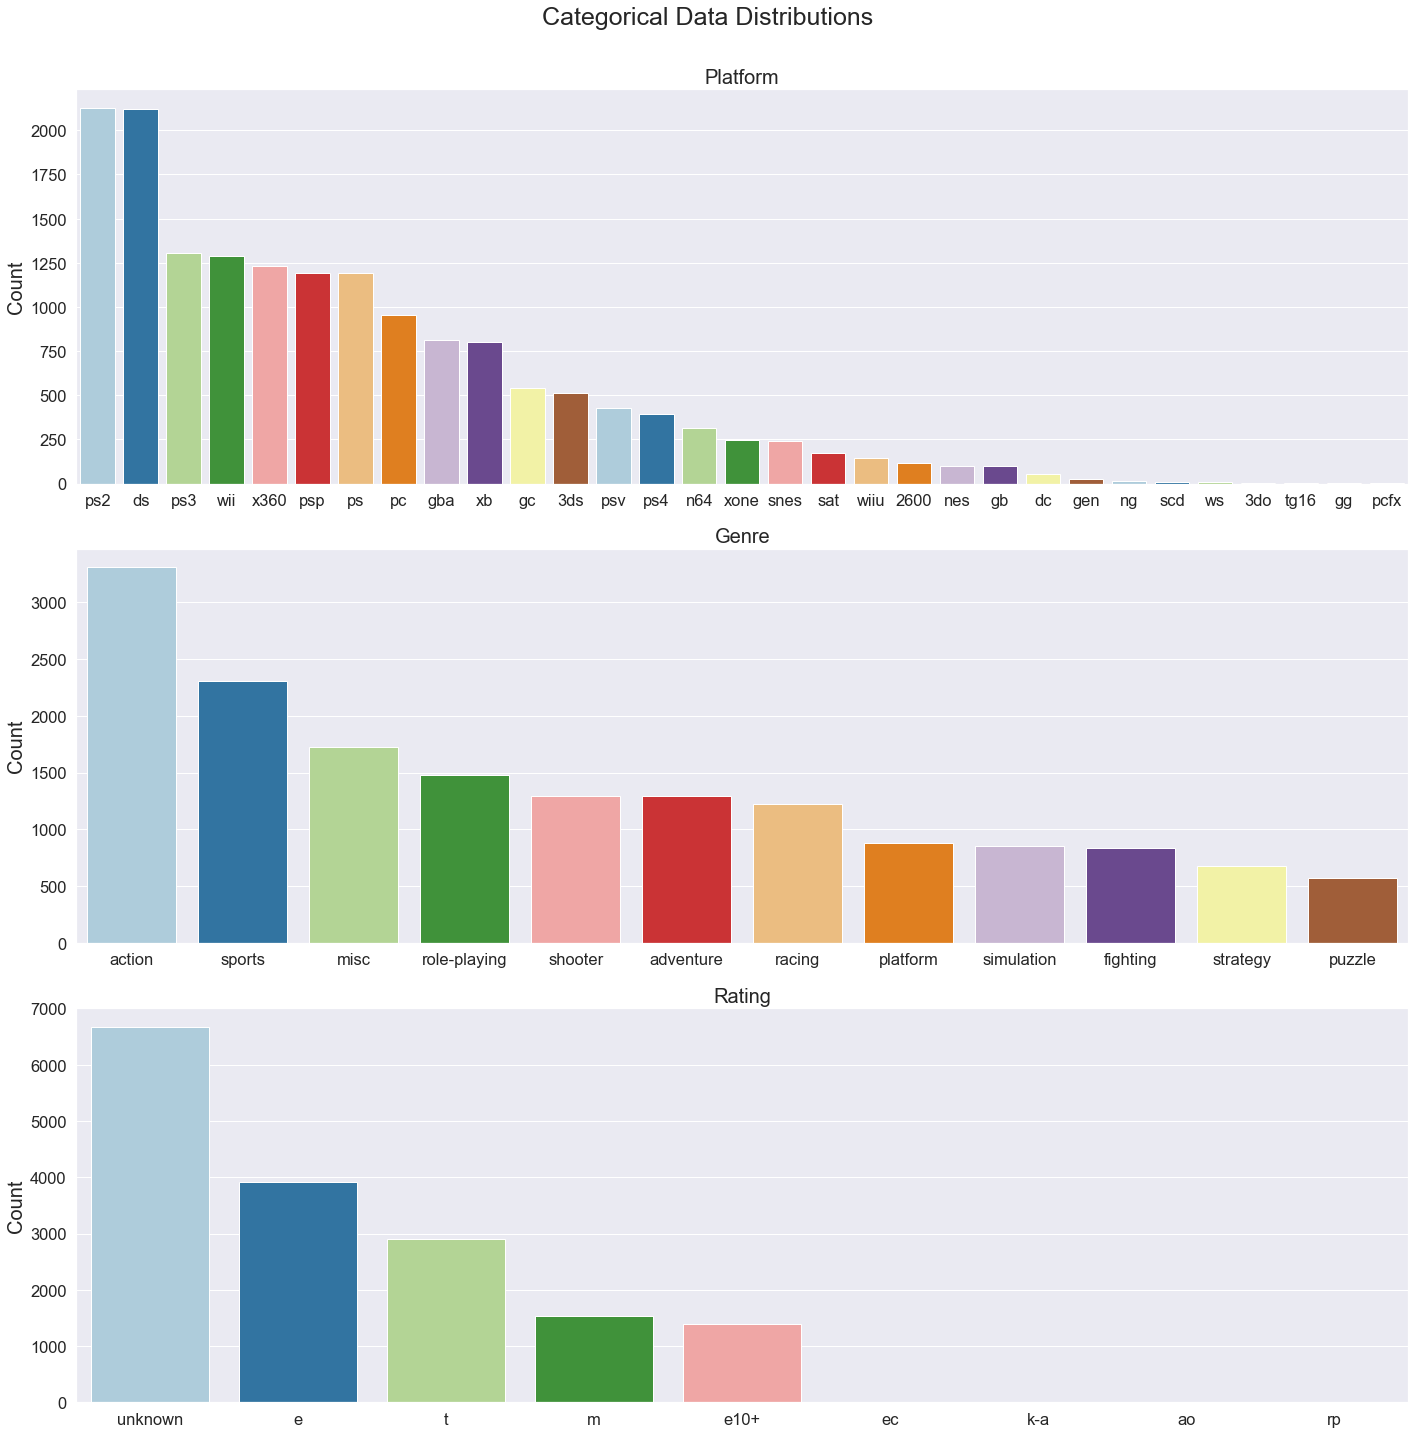

In [14]:
# distribution charts
sns.set(font_scale = 1.5)
cat_data = data.drop('name', axis=1).select_dtypes(include='object')
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Categorical Data Distributions', fontsize=25, y=1)
for column, ax in zip(cat_data, axs.ravel()):
    sns.countplot(x=data[column], order = data[column].value_counts().index, palette='Paired', ax=ax)
    ax.set_title(column.capitalize(), fontsize=20)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=20)
plt.tight_layout()
plt.show()

*Conclusions:*

- it is presented a broad range of consoles, the most popular are: PlayStation (35%), Nintendo DS, Wii, Xbox. Consoles are followed by PC games (5.8% of data);
- among the genres most popular are: Action, Sports, Role-playing, quite a lot of multi-genre games (Misc from miscellaneous) - 10.5%, followed by shooters and adventure games (8% each). 
- among the ratings leader is E (for everyone) (40% of data), followed by ratings T (29.7%) - teen, M (15.7%) - mature, E10(14.3%) - for everyone 10 y.o. and older.

Unpopular rating values will be removed because they occupy a small part of the data.

In [15]:
# number of rows for deletion
data['rating'].value_counts()

unknown    6676
e          3921
t          2905
m          1536
e10+       1393
ec            8
k-a           3
ao            1
rp            1
Name: rating, dtype: int64

*Conclusion: there are 13 rows for deletion.*

In [16]:
# deletion of the unpopular ratings and check
data = data.loc[data['rating'].isin(data['rating'].value_counts()[:5].index)]
data['rating'].unique()

array(['e', 'unknown', 'm', 't', 'e10+'], dtype=object)

## Numerical data processing

In this section let's look at the sales, year of release, and scores distributions, and calculate the total sales column.

In [17]:
for column in data.select_dtypes(include=['float64', 'int32']):
    print(
        f'\n\033[0;37;40m_____________{column.upper()} DESCRIPTION_____________\033[0;0m\n')
    display(data[column].describe().to_frame())


_____________YEAR_OF_RELEASE DESCRIPTION_____________



,year_of_release
count,16431.000000
mean,2006.486763
std,5.875814
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2016.000000



_____________NA_SALES DESCRIPTION_____________



,na_sales
count,16431.000000
mean,0.263896
std,0.818499
min,0.000000
25%,0.000000
50%,0.080000
75%,0.240000
max,41.360000



_____________EU_SALES DESCRIPTION_____________



,eu_sales
count,16431.000000
mean,0.145984
std,0.506893
min,0.000000
25%,0.000000
50%,0.020000
75%,0.110000
max,28.960000



_____________JP_SALES DESCRIPTION_____________



,jp_sales
count,16431.000000
mean,0.078460
std,0.311029
min,0.000000
25%,0.000000
50%,0.000000
75%,0.040000
max,10.220000



_____________OTHER_SALES DESCRIPTION_____________



,other_sales
count,16431.000000
mean,0.047617
std,0.188077
min,0.000000
25%,0.000000
50%,0.010000
75%,0.030000
max,10.570000



_____________CRITIC_SCORE DESCRIPTION_____________



,critic_score
count,7980.000000
mean,68.989223
std,13.917537
min,13.000000
25%,60.000000
50%,71.000000
75%,79.000000
max,98.000000



_____________USER_SCORE DESCRIPTION_____________



,user_score
count,7457.000000
mean,7.125774
std,1.499745
min,0.000000
25%,6.400000
50%,7.500000
75%,8.200000
max,9.700000


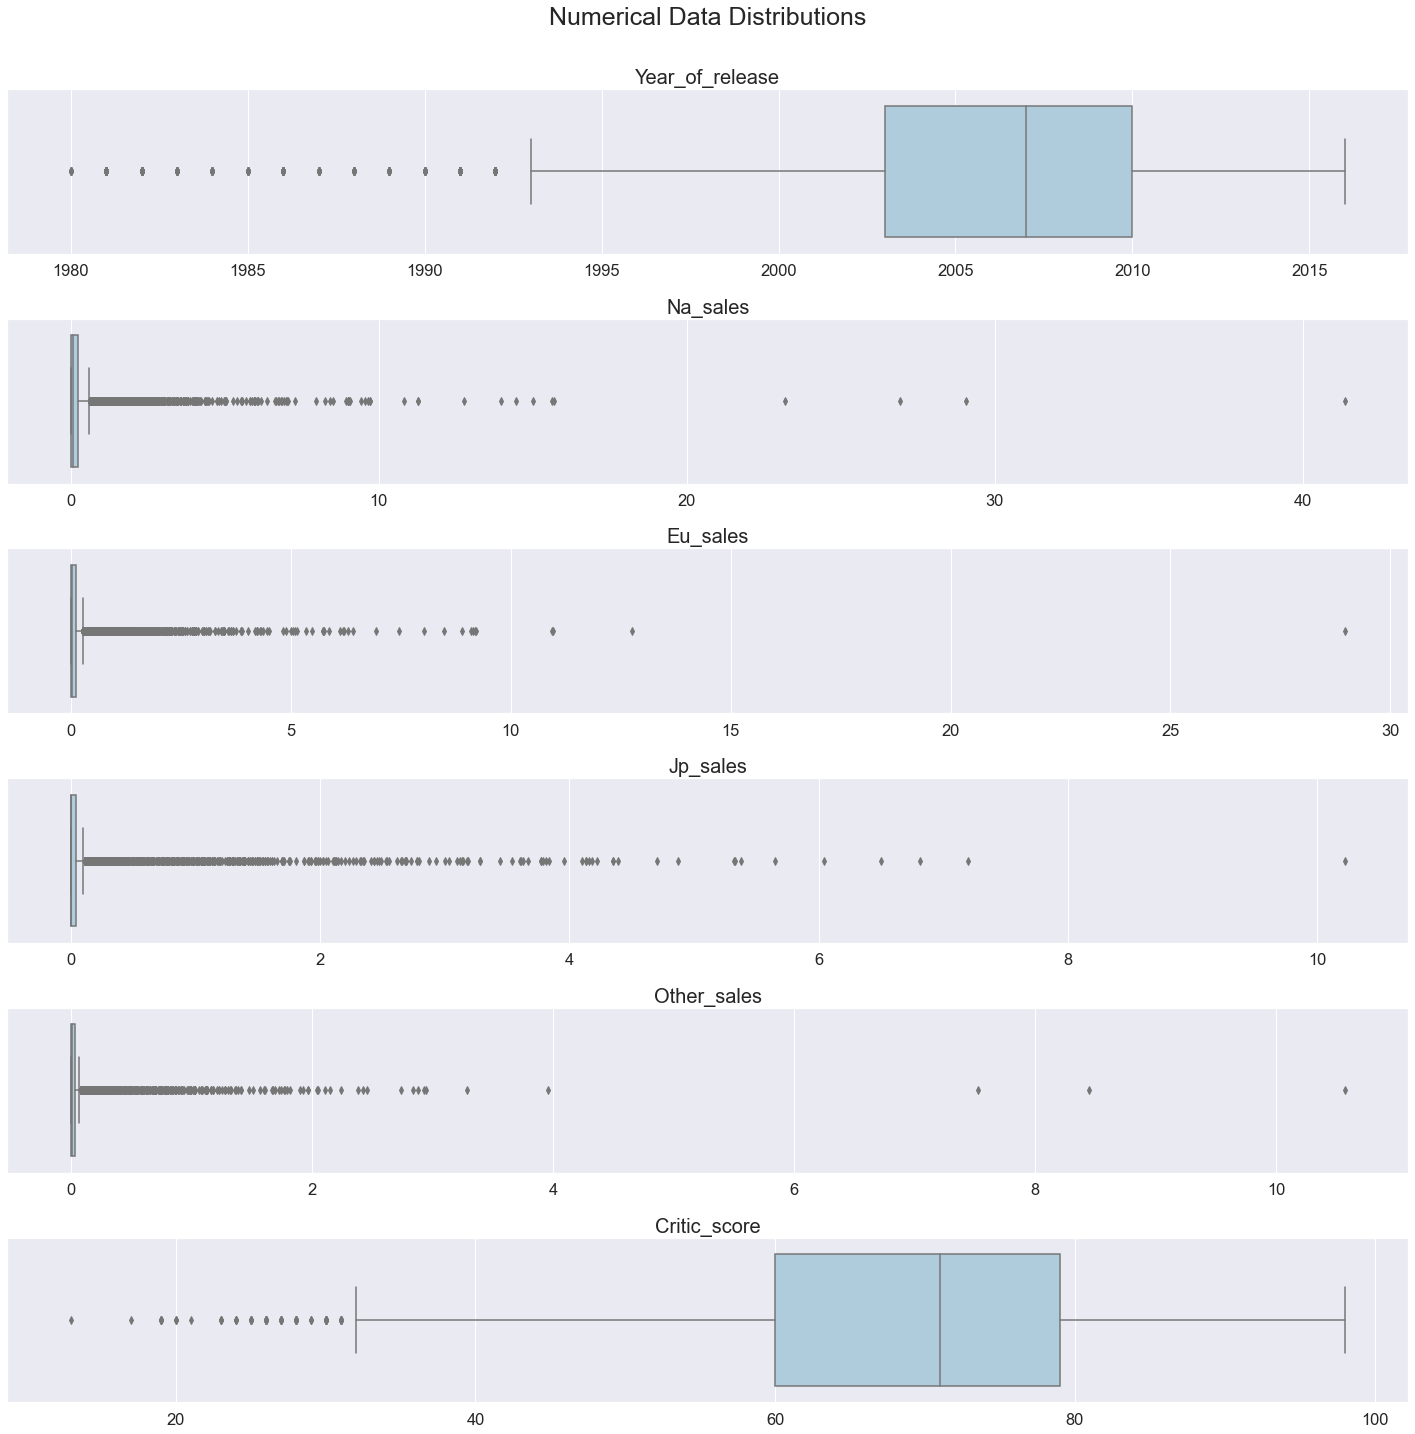

In [18]:
# distribution charts
sns.set(font_scale = 1.5)
cat_data = data.drop('name', axis=1).select_dtypes(include=['float64', 'int32'])
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Numerical Data Distributions', fontsize=25, y=1)
for column, ax in zip(cat_data, axs.ravel()):
    sns.boxplot(x=data[column], palette='Paired', ax=ax)
    ax.set_title(column.capitalize(), fontsize=20)
    ax.set_xlabel('')
plt.tight_layout()
plt.show()

*Conclusions:*

- most games were released between 2003 and 2010;
- the outliers in sales are due to a large number of zeros as well as bestsellers with very high sales. In the case of zeros, we can presume that the game in this area was not for sale;
- lower and upper quartile critical scores range from 60 to 80 points (this is above average), there are outliers to the left of the boxplot;
- lower and upper quartile users scores range from 6.4 to 8.2 points (even better than the critics' scores), there are outliers to the left of the boxplot as well;

In [19]:
# add column with total sales
data['total_sales'] = data.drop(
    ['year_of_release', 'critic_score', 'user_score'], axis=1).sum(
    axis=1, numeric_only=True)
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13062,operation flashpoint: dragon rising,pc,2009,shooter,0.02,0.03,0.00,0.01,76.0,4.9,m,0.06
14996,neverwinter nights diamond,pc,2004,role-playing,0.00,0.02,0.00,0.00,NaN,8.2,m,0.02
12127,midway arcade treasures 3,gc,2005,misc,0.05,0.01,0.00,0.00,65.0,NaN,e,0.06
11914,kidou senshi gundam: giren no yabou - axis no ...,ps2,2009,strategy,0.00,0.00,0.07,0.00,NaN,NaN,unknown,0.07
3984,star wars: clone wars,ps2,2002,shooter,0.24,0.19,0.00,0.06,NaN,NaN,unknown,0.49


,total_sales
count,16431.000000
mean,0.535956
std,1.559229
min,0.000000
25%,0.060000
50%,0.170000
75%,0.470000
max,82.540000


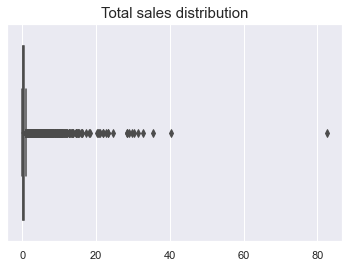

In [20]:
# total sales analysis
display(data['total_sales'].describe().to_frame())
sns.set(font_scale = 1)
sns.boxplot(x=data['total_sales'])
plt.title('Total sales distribution', fontsize=15)
plt.xlabel('');

*Conclusions: a similar picture of outlier values, typical for sales. Minimum value is 0, let's print these records below.*

In [21]:
# games with zeros in total sales
data.query('total_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,g1 jockey 4 2008,ps3,2008,sports,0.0,0.0,0.0,0.0,NaN,NaN,unknown,0.0
16709,score international baja 1000: the official game,ps2,2008,racing,0.0,0.0,0.0,0.0,NaN,NaN,unknown,0.0


*Conclusions: it looks like these games have not been released at all. User and critic scores are empty as well. Let’s delete these two records from the data.*

In [22]:
# удаление нулевых продаж
data = data.drop(data[data['total_sales'] == 0].index)

## Interim conclusions

During data preprocessing we've:
- edited column headings according to the naming convention in Python;
- processed missing values: NaN in the `Critic_Score` - 51.32%, `User_Score` - 40.09% columns we left as it is (due to the high ratio), the 'tbd' value in the `User_Score` column we replaced with NaN, in the `Rating` column to the 'unknown' value.
- transformed the data to the required types: `year_of_release` to int, `user_score` to float;
- processed duplicates (transform to the lowercase);
- for categorical data: checked unique values of rating, genres and platforms; evaluated distributions of these features:
    - most popular consoles are: PlayStation (about 35% of games), Nintendo DS, Wii, Xbox;
    - most popular genres are: Action, Sports, Role-playing, quite a lot of multigenre games (Misc from miscellaneous) - 10.5%;
    - ratings: E (everyone) (40% of data), T(29.7%) - teen, M(15.7%) - mature;
- distributions for numerical data:
    - most of the games released in 2003-2010;
    - outliers in sales are due to high zero values as well as bestsellers; some games are not sold in all regions;
    - lower and upper quartile critical scores range from 60 to 80 points (this is above average), there are outliers to the left of the boxplot;
    - lower and upper quartile users scores range from 6.4 to 8.2 points (even better than the critics' scores), there are outliers to the left of the boxplot as well;

# Exploratory Data Analysis (EDA)

In this section we shall analyze:
- the release dynamics;
- sales by platforms;

Based on that, we will select the *actual period*, with which we will continue to work: we will evaluate the potentially profitable platforms, genres, as well as the impact of user and critic score.

## Release dynamics, sales by platforms

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


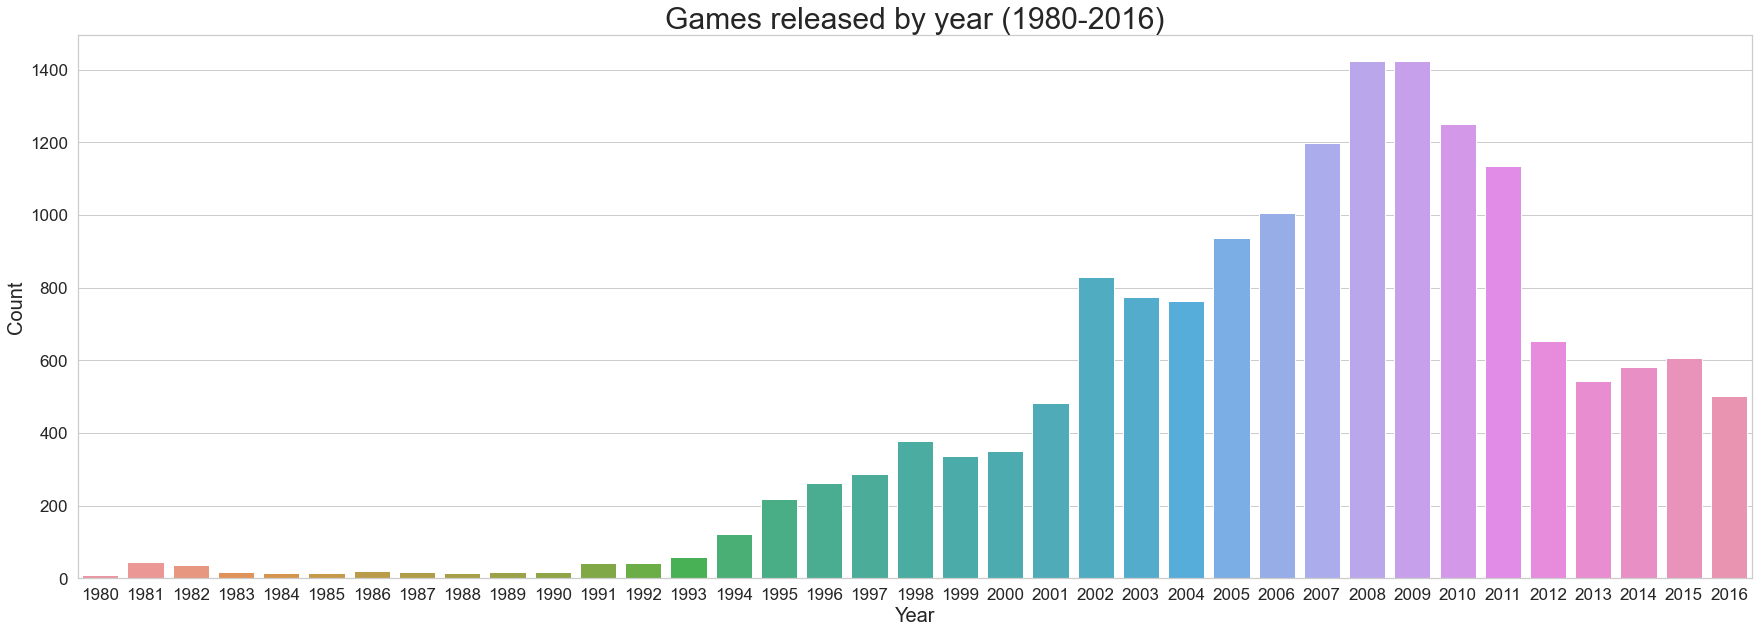

In [23]:
# release dynamics
games_by_year = data.groupby('year_of_release')['name'].agg('count').to_frame()
display(games_by_year.head())

# viz
plt.figure(figsize=(30, 10))
sns.set_style('whitegrid')
sns.barplot(data=games_by_year, x=games_by_year.index, y='name')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Games released by year (1980-2016)', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=17);

*Conclusions: the number of games released has been rising since the 1990s. In 1995 it exceeded 200 games. The peak falls on the period of 2006 - 2011. After that it sharply falls to approx. 600 games per year.*

,total_sales
platform,
ps2,1233.32
x360,961.24
ps3,931.34
wii,890.52
ds,802.13
ps,725.67
ps4,314.14
gba,312.88
psp,289.53


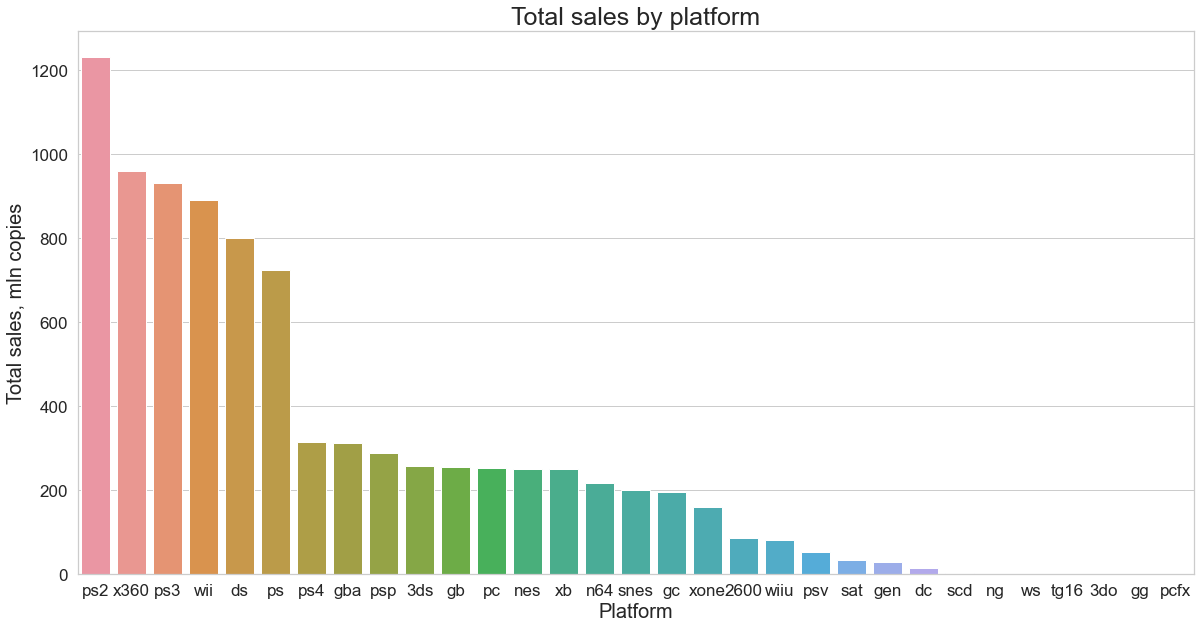

In [24]:
# sales by platforms
sales_by_platform = data.groupby('platform')['total_sales'].agg('sum').to_frame().sort_values(by='total_sales', ascending=False)
display(sales_by_platform)

# viz
plt.figure(figsize=(20, 10))
sns.barplot(data=sales_by_platform, x=sales_by_platform.index, y='total_sales')
plt.xlabel('Platform', fontsize=20)
plt.ylabel('Total sales, mln copies', fontsize=20)
plt.title('Total sales by platform', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=17);

*Conclusions: leaders are: ps2, x360, ps3, wii, ds, ps. Let's analyse the sales dynamics separately.*

year_of_release,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
ps2,0.00,0.00,0.00,0.00,0.00,0.00,39.17,166.43,205.38,184.31,...,75.99,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00
x360,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52
ps3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
wii,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,152.77,171.32,206.97,127.29,59.65,21.71,8.59,3.75,1.14,0.18
ds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,146.94,145.31,119.34,85.02,25.73,11.01,1.54,0.00,0.00,0.00
ps,6.03,35.96,92.79,136.17,169.49,144.53,96.37,35.59,6.67,2.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


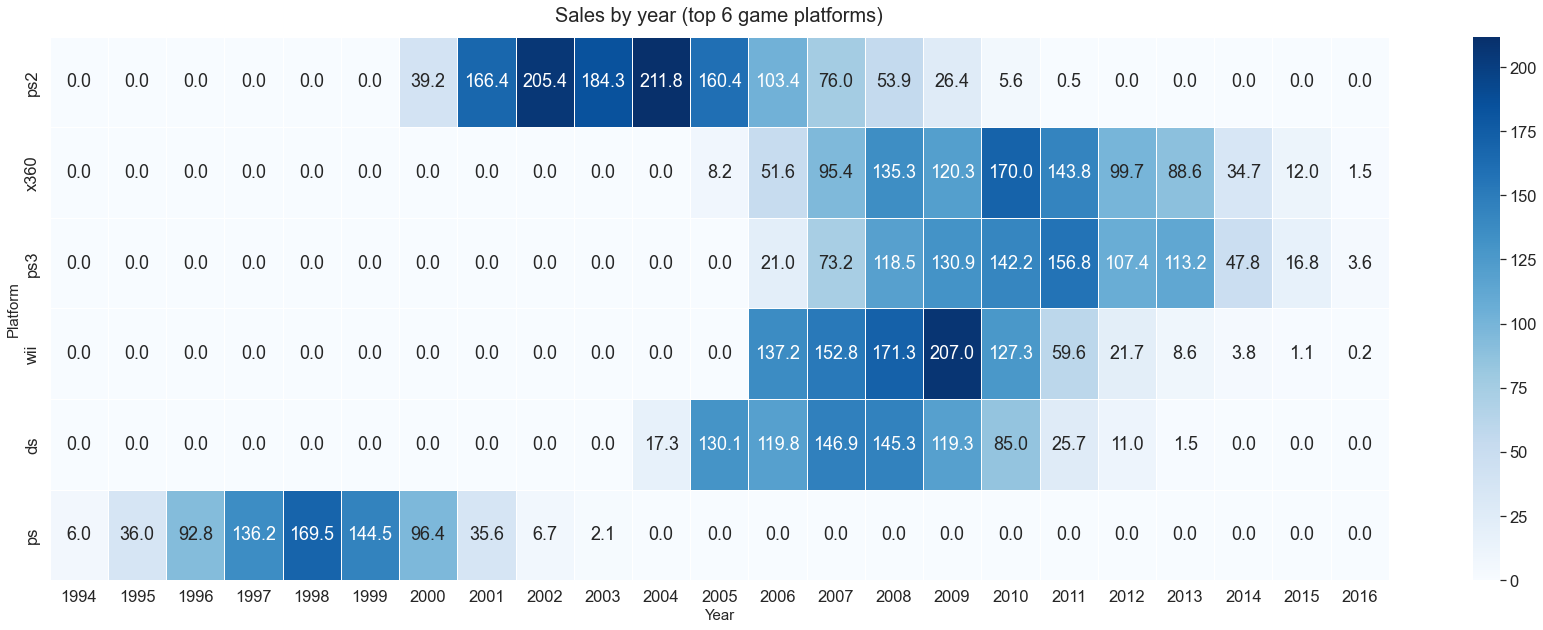

In [25]:
# sales leaders
top_sales = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
top_sales = top_sales.loc[1994:][['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']].fillna(0).T
display(top_sales)

# viz
plt.figure(figsize=(30, 10))
sns.set(font_scale = 1.5)
plt.title('Sales by year (top 6 game platforms)', pad=15, fontsize=20)
sns.heatmap(top_sales, annot=True, linewidths=.5, fmt='.1f', cmap='Blues')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Platform', fontsize=15);

*Conclusions: according to the heatmap "lifetime" of the game platform is about 7-10 years. The PS2 replaced the PS in 2000 and was the most successful since then. In 2006, sales of the PS3, X360 and Wii began to rise simultaneously, while the high sales of the platform DS as well (due to the jump in released games earlier).*

## Actual period

To forecast for 2017, we will use the period 2012-2016 for the *actual period*. All further analysis will be provided for that period only.

In [26]:
# selecting actual period
data = data.query('year_of_release >= 2012', engine='python')
print('Number of records in analyzed period:', len(data))

Number of records in analyzed period: 2886


## Sales by platforms

In this section, let’s select the leading platforms and analyze their sales dynamics for the period 2012-2016 as well as predict potentially profitable platforms for 2017.

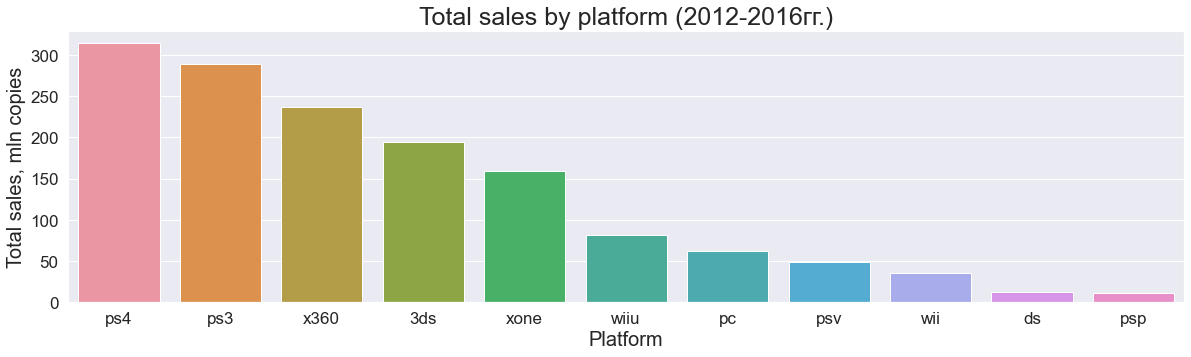

In [27]:
# sales by platforms
top_sales = data.groupby('platform')['total_sales'].agg('sum').to_frame().sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(20, 5))
sns.barplot(data=top_sales, x=top_sales.index, y='total_sales')
plt.xlabel('Platform', fontsize=20)
plt.ylabel('Total sales, mln copies', fontsize=20)
plt.title('Total sales by platform (2012-2016гг.)', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=17);

*Conclusions: leaders are 3 и 4 Playstation, X360, 3DS and Xone.*

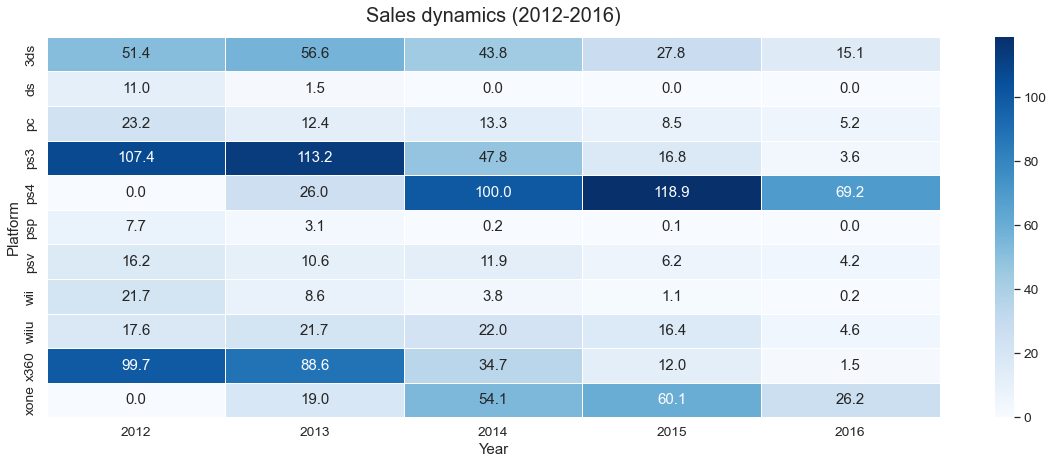

In [28]:
 # sales dynamics
plt.figure(figsize=(20, 7))
sns.set(font_scale = 1.25)
sales_dynamics = data.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum').fillna(0).T
plt.title('Sales dynamics (2012-2016)', pad=15, fontsize=20)
sns.heatmap(sales_dynamics, annot=True, linewidths=.5, fmt='.1f', cmap='Blues')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Platform', fontsize=15);

*Conclusions:* 
- since 2012, we have observed sales growth for PS4 and Xone (announced in 2013), which begin to decrease in 2015; 
- the popularity of the X360 and PS3 is declining over the period (announced in 2005 and 2006 respectively). Given the «lifetime» of the platform (7-10 years), they may be considered obsolete;
- PC sales are declining over the period;
- the popularity of 3DS (2010) grows until 2013, and then decreases;
- PSP, Wii and DS end the period with zero sales;
- in 2013-2015 sales of PS4 grows, but by 2016 they had dropped due to the announcement of a new version;
- sales of PS Vita (announced at the end of 2011) is declining over the period , despite the recent release;
- Wii U, announced at the end of 2012, increased sales until 2014, but then began to decline;

Given the «lifetime» and observations above, the potential profitable platforms are: PS4, Xone, 3DS (sales are declining but still quite high), perhaps PC (possible sales growth due to the global slowdown in the platform market). 

Let's create the boxplots on the total sales of games per platform. Because of high outliers (especially for Playstation and X360), we set limits on the x-axis.

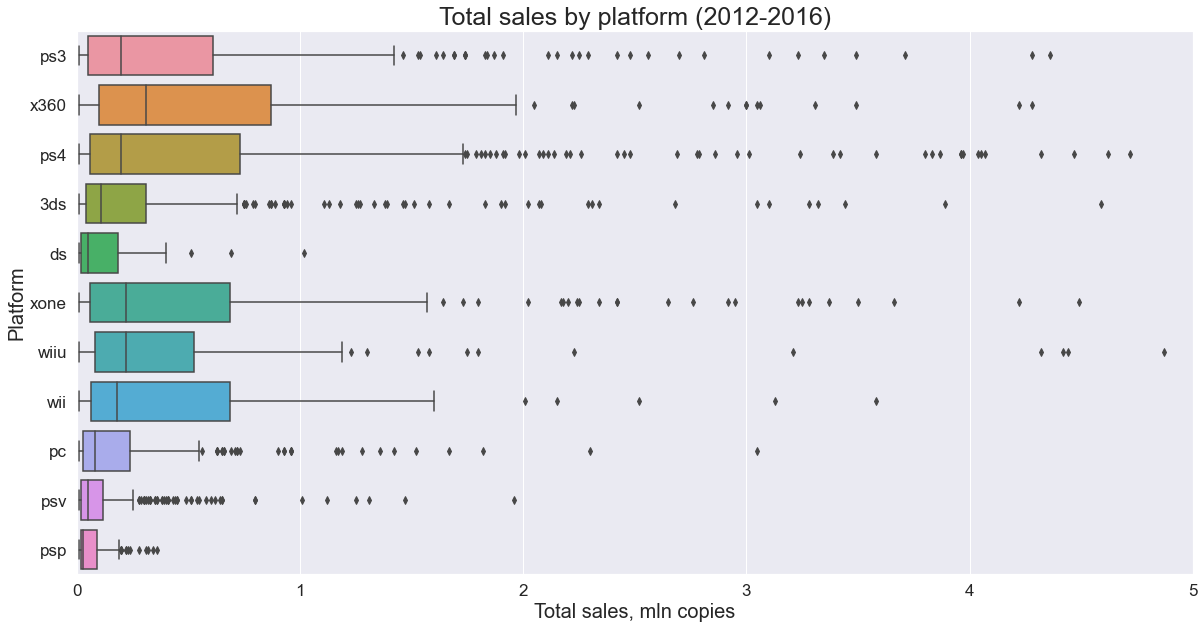

In [29]:
plt.figure(figsize=(20, 10))
sns.boxplot(y="platform", x="total_sales", data=data)
plt.xlim(0, 5)
plt.title ('Total sales by platform (2012-2016)', fontsize=25)
plt.ylabel('Platform', fontsize=20)
plt.xlabel('Total sales, mln copies', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=17);

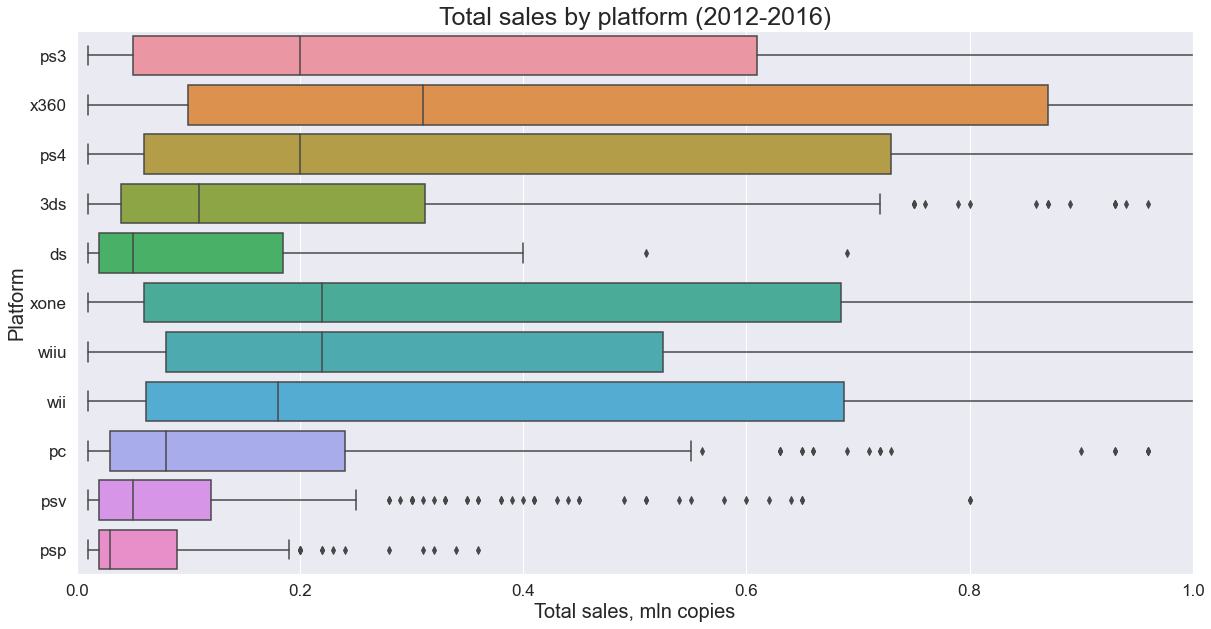

In [30]:
# scaling up
plt.figure(figsize=(20, 10))
sns.boxplot(y="platform", x="total_sales", data=data)
plt.xlim(0, 1)
plt.title ('Total sales by platform (2012-2016)', fontsize=25)
plt.ylabel('Platform', fontsize=20)
plt.xlabel('Total sales, mln copies', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=17);

*Conclusions: on the chart we observe a large amount of outliers, which indicate the most successful games for each platform. The largest number of them belong to the most popular platforms, especially to PS4. It is noticeable that the Wii boxplot is almost equal to the leading platforms, although it ranks only 9th in total sales. The same goes for the Wii U - sales median is even higher than for Wii and almost equals to the leading platforms. Wii and Wii U are more stable, but generally have little success. The average 3DS (which is in 4th place in total sales) is closer to the outsiders, but on the chart we see more outliers - games-bestsellers.*

To the potentially profitable platforms, we are adding Wii U for its stability and its relatively short "lifetime" (released at the end of 2012). Its sales may increase.

## User and critical reception

In this section, we evaluate the correlation between scores and sales using scatterplots and correlation coefficients. The analysis will be based on the four most popular platforms in the actual period - PS4, PS3, X360, 3DS.

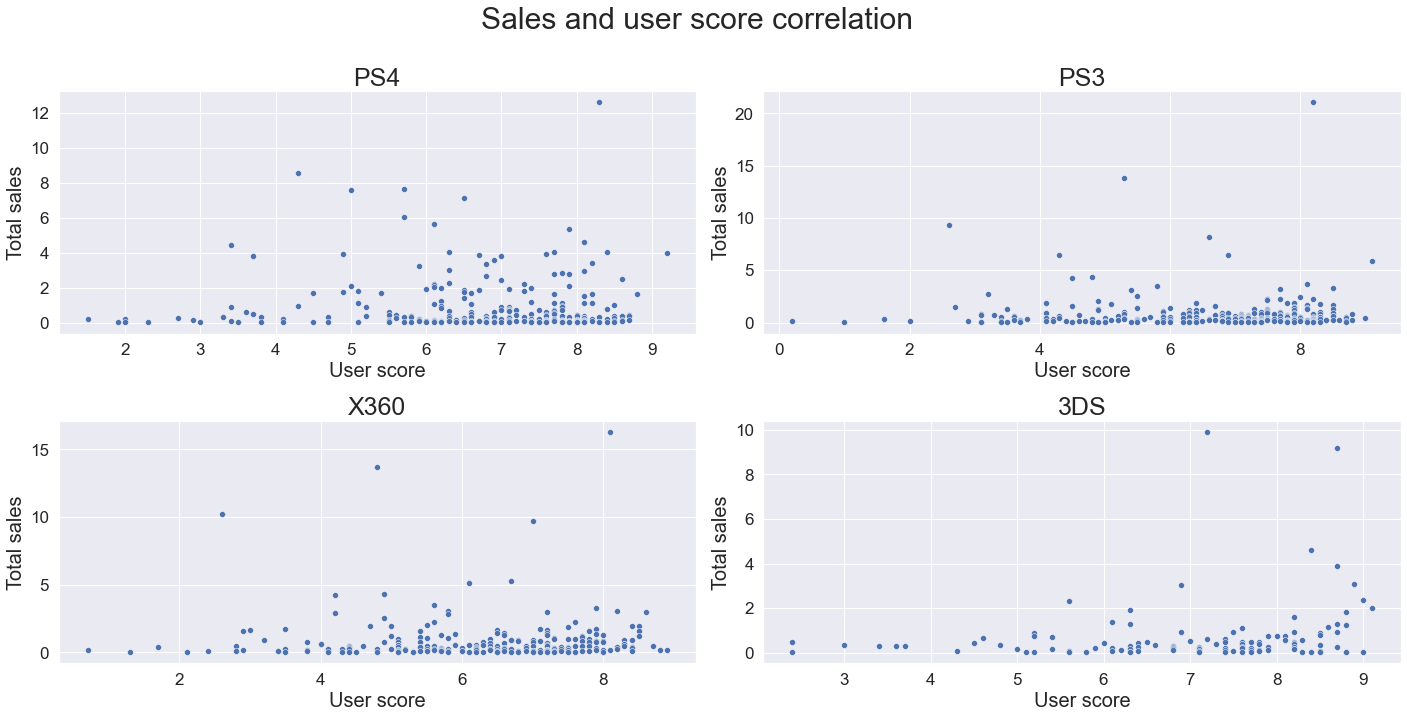

In [31]:
# scatterplots (sales/user_score)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Sales and user score correlation', fontsize=30, y=1)
for name, ax in zip(top_sales.index[:4], axs.ravel()):
    sns.scatterplot(data=data[data['platform'] == name], x='user_score', y='total_sales', palette='Paired', ax=ax)
    ax.set_title(name.upper(), fontsize=25)
    ax.set_xlabel('User score', fontsize=20)
    ax.set_ylabel('Total sales', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=17)
plt.tight_layout()
plt.show()

*Conclusions: overall, sales are not highly dependent on user scores. An exception is the 3DS platform: we observe strong relationship between scores and sales. For X360 and PS3 platforms some dependencies may be assumed as well. The weakest correlation can be observed for PS4 - games with 3-6 score can have successful sales numbers.*

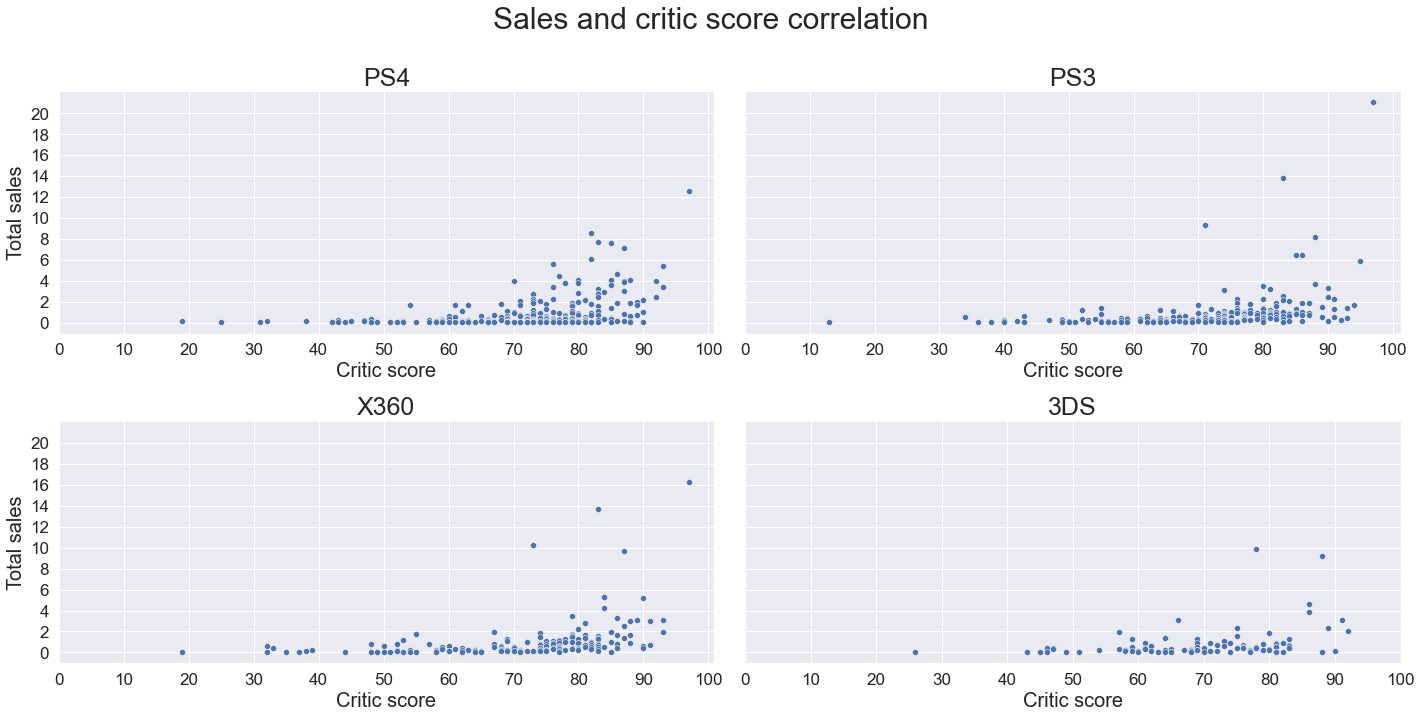

In [32]:
# scatterplots (sales/critic_score)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey=True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Sales and critic score correlation', fontsize=30, y=1)
for name, ax in zip(top_sales.index[:4], axs.ravel()):
    sns.scatterplot(data=data[data['platform'] == name], x='critic_score', y='total_sales', palette='Paired', ax=ax)
    ax.set_title(name.upper(), fontsize=25)
    ax.set_xlabel('Critic score', fontsize=20)
    ax.set_yticks(np.arange(0, 22, 2))
    ax.set_xticks(np.arange(0, 110, 10))
    ax.set_ylabel('Total sales', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=17)
plt.tight_layout()
plt.show()

*Conclusions: correlation between critical scores and sales can be observed for all game platforms. Note that only a few 3DS games scored 80 points or more (compared to previous platforms) and games with scores above 90 for the PS4 were very successful.*

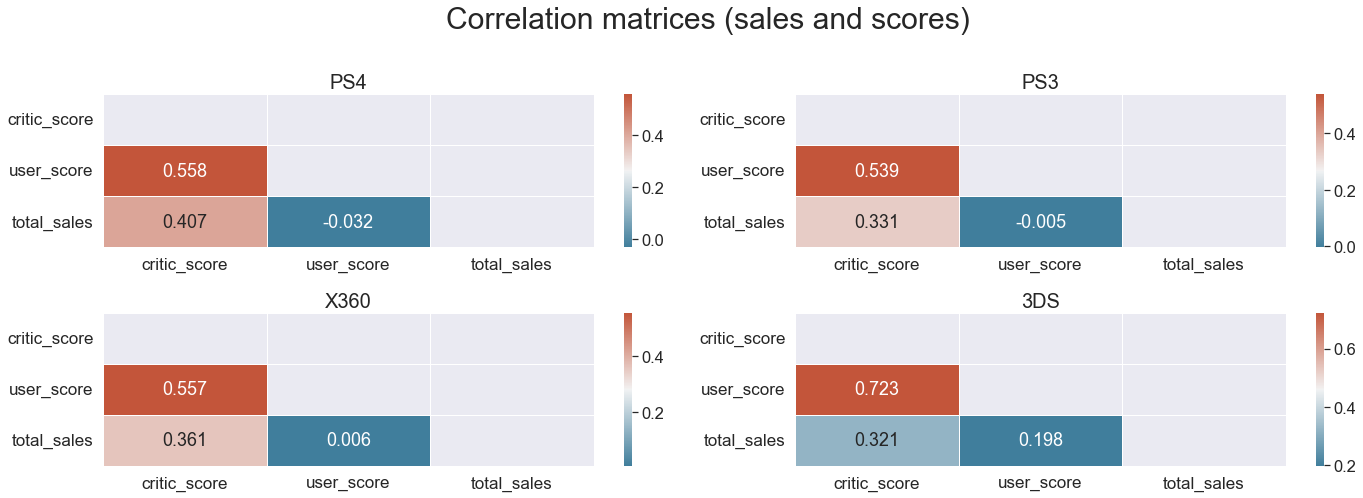

In [33]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))
plt.subplots_adjust(hspace=0.5)
sns.set(font_scale = 1.5)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig.suptitle('Correlation matrices (sales and scores)', fontsize=30, y=1)
for name, ax in zip(top_sales.index[:4], axs.ravel()):
    corrmatrix = data[data['platform'] == name][['critic_score', 'user_score', 'total_sales']].corr()
    mask = np.triu(np.ones_like(corrmatrix, dtype=bool))
    sns.heatmap(corrmatrix, mask=mask, annot=True, linewidths=.5, fmt='.3f', cmap=cmap, ax=ax)
    ax.set_title(name.upper(), fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=17)
plt.tight_layout()
plt.show()

*Conclusions: Pearson's correlation coefficient shows a strong correlation between critics' and users' scores (over 0.5 for all platforms, 0.7 for 3DS), a weak correlation between critics' scores (0.4 for PS4 and 0.3 for the rest platforms) and sales and a no correlation (0.1 and less) between user scores and sales.*

Because of the outliers in the data, and as the rating can be considered as rank, we will estimate the correlation with the Spirman coefficient.

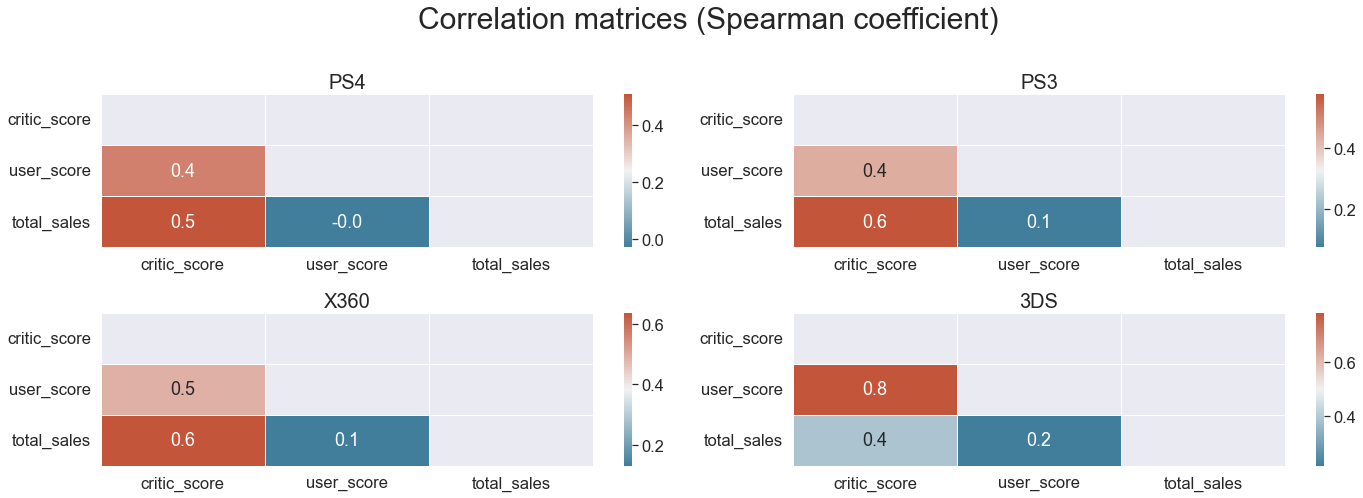

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Correlation matrices (Spearman coefficient)', fontsize=30, y=1)
for name, ax in zip(top_sales.index[:4], axs.ravel()):
    corrmatrix = data[data['platform'] == name][['critic_score', 'user_score', 'total_sales']].corr(method='spearman')
    sns.heatmap(corrmatrix, mask=mask, annot=True, linewidths=.5, fmt='.1f', cmap=cmap, ax=ax)
    ax.set_title(name.upper(), fontsize=20)
plt.tight_layout()
plt.show()

*Conclusions: Spearman’s rank correlation coefficient shows a close correlation (0.5-0.6) between critics' scores and sales for all platforms except 3DS (0.4), no relationship (less than 0.2) between users' scores and sales, and a strong correlation between users' and critics' scores (0.4-0.5, 0.8 for 3DS). The features of the 3DS platform differ slightly.*

## Potentially profitable game genres

In this section we analyze the general distribution of games by genres and look for potentially profitable/not profitable.

,genre,variable,value
0,action,count,1031.00
12,action,total_sales,441.12
7,role-playing,count,370.00
20,shooter,total_sales,304.73
1,adventure,count,302.00


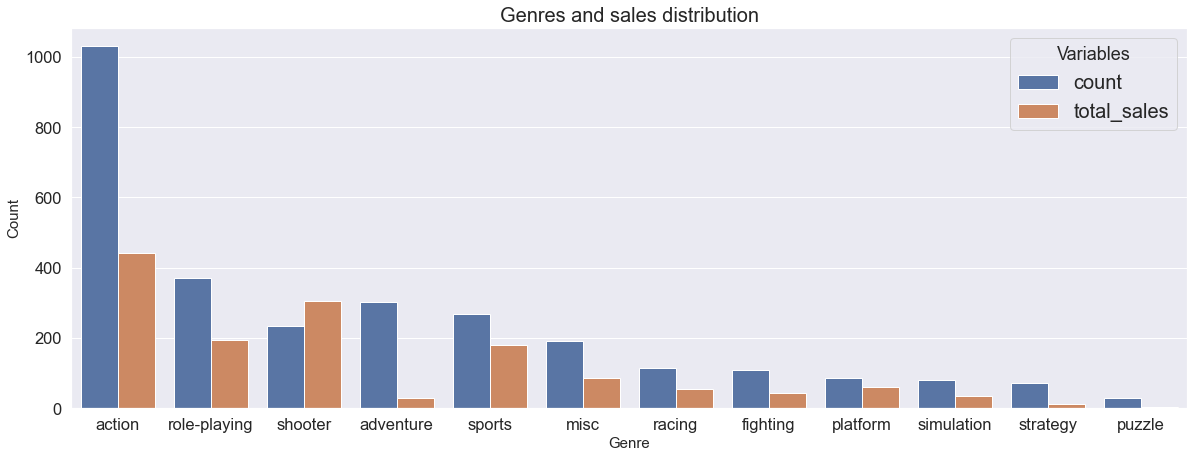

In [35]:
# calculation of the number of genres and total sales
genres = data.pivot_table(index='genre', 
                          values=['name', 'total_sales'], 
                          aggfunc={'name':'count', 'total_sales':'sum'}).reset_index()
genres.columns = ['genre', 'count', 'total_sales']
genres = genres.melt(id_vars='genre').sort_values(by='value', ascending=False)
display(genres.head())

# viz
plt.figure(figsize=(20, 7))
sns.barplot(data=genres, x='genre', y='value', hue='variable')
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Genres and sales distribution', fontsize=20)
plt.legend(title='Variables', prop={'size': 20});

*Conclusions: action genre leads both in the number of games as well as in the amount of sales. Role-playing, Adventure, Sports, and Shooter have the same level of popularity, but Adventure has almost no profit. The rest of them are almost as profitable (a little better are shooters). Other genres have neither popularity nor profit.*

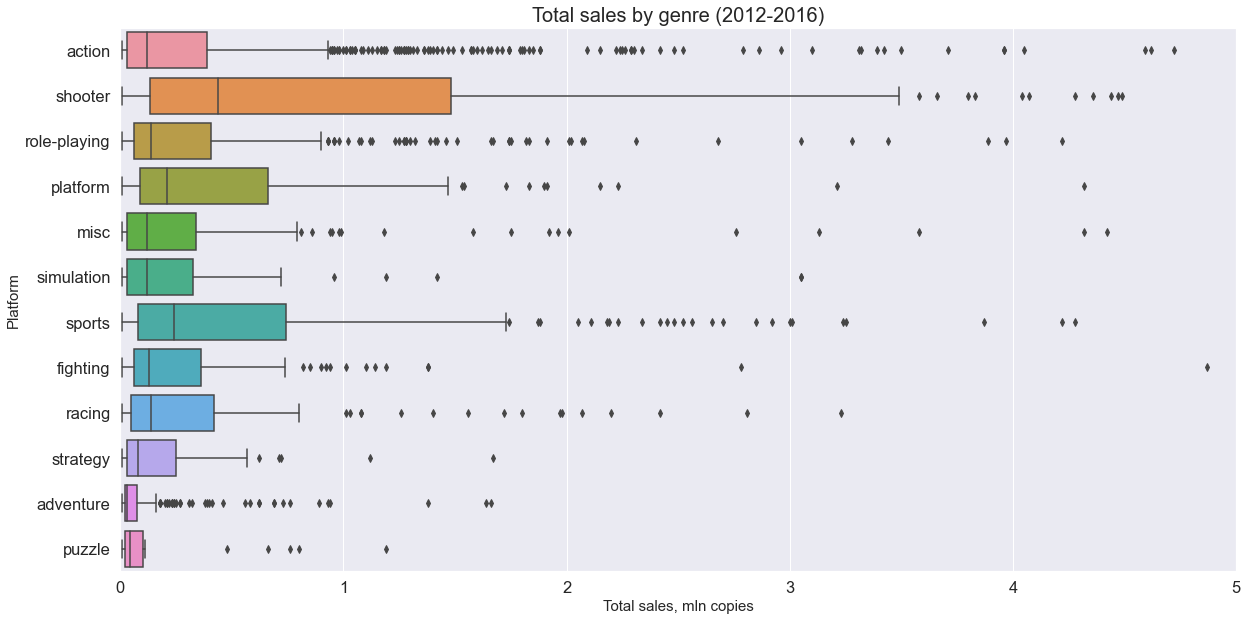

In [36]:
# sales boxplots
plt.figure(figsize=(20, 10))
sns.boxplot(y='genre', x='total_sales', data=data)
plt.xlim(0, 5)
plt.title ('Total sales by genre (2012-2016)', fontsize=20)
plt.ylabel('Platform', fontsize=15)
plt.xlabel('Total sales, mln copies', fontsize=15);

*Conclusions: the most successful Action is only successful at the expense of bestsellers, median is equal to the non-profitable genres. The same can be said about Role-playing genre. Stable profit performance have Sports and Platform genres (Platform is at the bottom of the list in terms of overall profitability and popularity, this genre lacks bestsellers). Adventure is one of the most unprofitable genres, along with Puzzle. Shooter has the best performance: the highest median, wide IQR and it has games bestsellers.*

## Interim conclusions

*General analysis:*
- the number of games released has been rising since the 1990s. In 1995 it exceeded 200 games per year. The peak falls on the period of 2006 - 2011. After that it sharply falls to approx. 600 games per year;
- sales leaders are: ps2, x360, ps3, wii, ds, ps;
- «lifetime» of the platform is about 7-10 years;
- PS2 has the highest sales success of its period;

*Actual period (2012-2016), sales forecasting:*
- sales leaders are 3 и 4 Playstation, X360, 3DS and Xone;
- given the «lifetime» and sales dynamics, the potential profitable platforms are: PS4, Xone, 3DS (sales are declining but still quite high), perhaps PC (possible sales growth due to the global slowdown in the platform market);
- to the potentially profitable platforms, we are adding Wii U for its stability and its relatively short "lifetime" (released at the end of 2012). Its sales may increase;

*User and critical reception:*
- overall, sales are not highly dependent on user scores. An exception is the 3DS platform: we observe strong relationship between scores and sales. The weakest correlation can be observed for PS4 - games with 3-6 score can have successful sales numbers;
- correlation between critical scores and sales can be observed for all game platforms. Note that only a few 3DS games scored 80 points or more (compared to previous platforms) and games with scores above 90 for the PS4 were very successful;
- Pearson's correlation coefficient shows a strong correlation between critics' and users' scores (over 0.5 for all platforms, 0.7 for 3DS), a weak correlation between critics' scores (0.4 for PS4 and 0.3 for the rest platforms) and sales and a no correlation (0.1 and less) between user scores and sales;
- Spearman’s rank correlation coefficient shows a close correlation (0.5-0.6) between critics' scores and sales for all platforms except 3DS (0.4), no relationship (less than 0.2) between users' scores and sales, and a strong correlation between users' and critics' scores (0.4-0.5, 0.8 for 3DS); 


*Genres analysis:*   

Barplot:   
- Action genre leads both in the number of games as well as in the amount of sales;
- Role-playing, Adventure, Sports, and Shooter have the same level of popularity, but Adventure has almost no profit;

Boxplot:    
- Action is only successful at the expense of bestsellers, median is equal to the non-profitable genres. The same can be said about Role-playing genre;
- stable profit performance have Sports and Platform genres (Platform is at the bottom of the list in terms of overall profitability and popularity, this genre lacks bestsellers);
- Adventure is one of the most unprofitable genres, along with Puzzle;
- Shooter has the best performance: the highest median, wide IQR and it has games bestsellers;

# User portrait by region.

For each region (NA, EU, JP) let's define:
- the top 5 platforms, sales difference;
- the top 5 genres;
- the effect of the ESRB rating on sales;

## Analysis of popular platforms

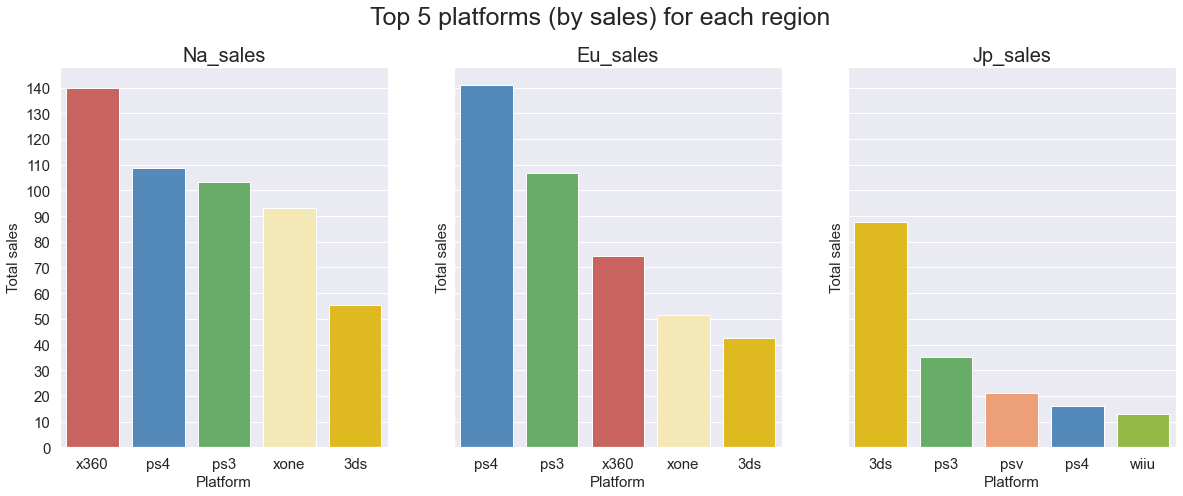

In [37]:
# rating of popular (max sales) platforms by region
colors = {'x360': "#d9534f", 'ps2': "#5bc0de", 'ps3': "#5cb85c", 'ps4':'#428bca', 'xone':'#ffeead',
         '3ds':'#ffcc00', 'psv':'#ff9966', 'wiiu':'#99cc33'}
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 7), sharey=True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Top 5 platforms (by sales) for each region', fontsize=25, y=1)
for name, ax in zip(data.columns[4:7], axs.ravel()):
    sns.barplot(data=data.pivot_table(index='platform', values=name, aggfunc='sum')
                .reset_index()
                .sort_values(by=name, ascending=False)
                .head(), 
                    x='platform', y=name, palette=colors, ax=ax)
    ax.set_title(name.capitalize(), fontsize=20)
    ax.set_xlabel('Platform', fontsize=15)
    ax.set_yticks(np.arange(0, 150, 10))
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_ylabel('Total sales', fontsize=15)
plt.show()

*Conclusions:*
- in each region the most popular platform is different (NA - XBOX, EU - PS4, JP - 3DS); 
- the ratings of America and Europe are similar, and the rating of Japan is very different: there are PSV and Wii U platforms, and 3DS ranks first (only fifth for NA and EU);
- America leads in overall sales, followed by Europe and Japan;
- the most successful platform in the Americas and Europe has similar sales amounts (about 140 million. copies);
- 2-4 place of sales in NA have a small difference, compared to other regions (for example, 3DS in Japan leads by a huge margin of 90million copies compared to 35 million copies for second place).

In [38]:
# rating of popular (max sales) platforms by region (ratio)
pd.options.display.float_format = "{:,.2f}".format
for name in data.columns[4:7]:
    print(f'\n\033[0;37;40m_____________{name.upper()} PLATFORM SALES RATIO_____________\033[0;0m\n')
    display(data.groupby('platform')[name]
            .sum()
            .rename('ratio')
            .transform(lambda x:x/x.sum()*100)
            .reset_index()
            .sort_values(by='ratio', ascending=False).head(5))


_____________NA_SALES PLATFORM SALES RATIO_____________



,platform,ratio
9,x360,23.70
4,ps4,18.40
3,ps3,17.49
10,xone,15.76
0,3ds,9.36



_____________EU_SALES PLATFORM SALES RATIO_____________



,platform,ratio
4,ps4,27.84
3,ps3,21.08
9,x360,14.70
10,xone,10.18
0,3ds,8.41



_____________JP_SALES PLATFORM SALES RATIO_____________



,platform,ratio
0,3ds,45.59
3,ps3,18.32
6,psv,10.93
4,ps4,8.29
8,wiiu,6.76


*Conclusions:*
- leaders in NA and EU account for 23.7% and 27.8% respectively, while in Japan 3DS captures more than 45% of sales;
- in NA, there are many equally popular platforms - PS4, PS3, XONE have similar sales figures (18.4% - 15.7%)
- In EU, the two most popular platforms - the second place PS3 is not far behind the leader PS4 - 21.08% and 27.8%;
- JP: platforms other than 3DS are not very popular in the Japanese market (PS3 - 18.3%, then PSV only 10.9%);

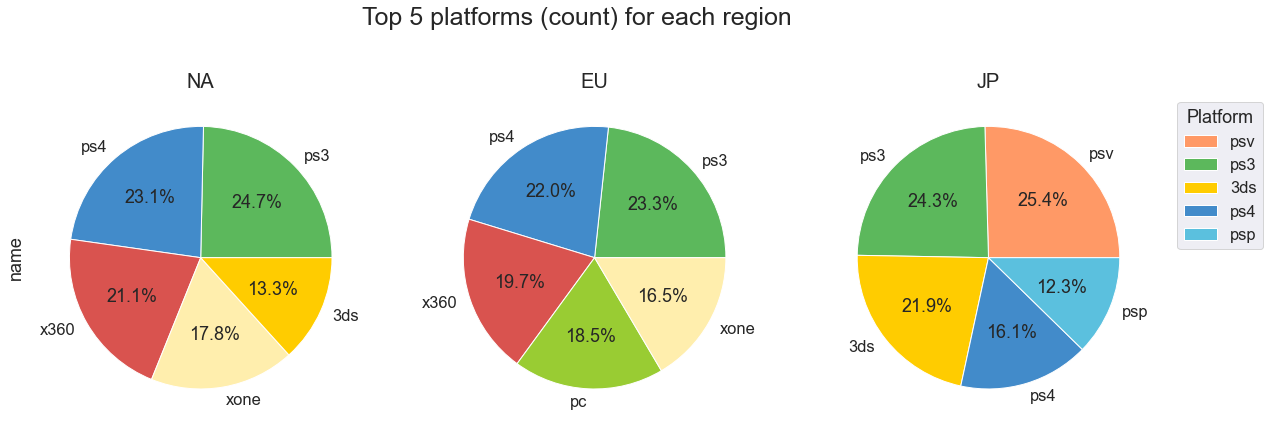

In [39]:
# games released ratio
cdict = {'x360': "#d9534f", 'psp': "#5bc0de", 'ps3': "#5cb85c", 'ps4':'#428bca', 'xone':'#ffeead',
         '3ds':'#ffcc00', 'psv':'#ff9966', 'pc':'#99cc33'}
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 7), sharey=True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Top 5 platforms (count) for each region', fontsize=25, y=1)
for name, ax in zip(data.columns[4:7], axs.ravel()):
    filter_data = data[data[name] != 0]
    pie_data = filter_data.pivot_table(index='platform', values='name', aggfunc='count').reset_index().sort_values(by='name', ascending=False).head()
    colors = [cdict[x] for x in pie_data['platform']]
    pie_data.plot.pie(y='name', labels=pie_data['platform'], ax=ax, colors=colors, autopct='%1.1f%%')
    ax.set_title(name.upper()[:2], fontsize=20)
    ax.get_legend().remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Platform')
plt.show()

*Conclusions: overall, the top 5 platforms have practically equal shares among themselves for all regions.*
- NA: Xbox is the leader, having the same share of released games as the other 4 platforms (i.e. on average it sells better); the share of 3DS is slightly smaller, this platform takes 5th place;
- EU: PS4 is the leader, having the same share of released games as the other 4 platforms (i.e. on average it sells better); 3DS is not in the top 5 in number of released games (but it has 5th place in sales), while PC, despite the high number of games, is not the leader in sales;
- JP: 3DS, taking around 20% of released games, significantly outperforms competitors in sales; Wii U is not in the top 5 in terms of number of released games (5th place in sales), while PSP, despite the number of games, is not in the sales ranking;

## Analysis of popular genres

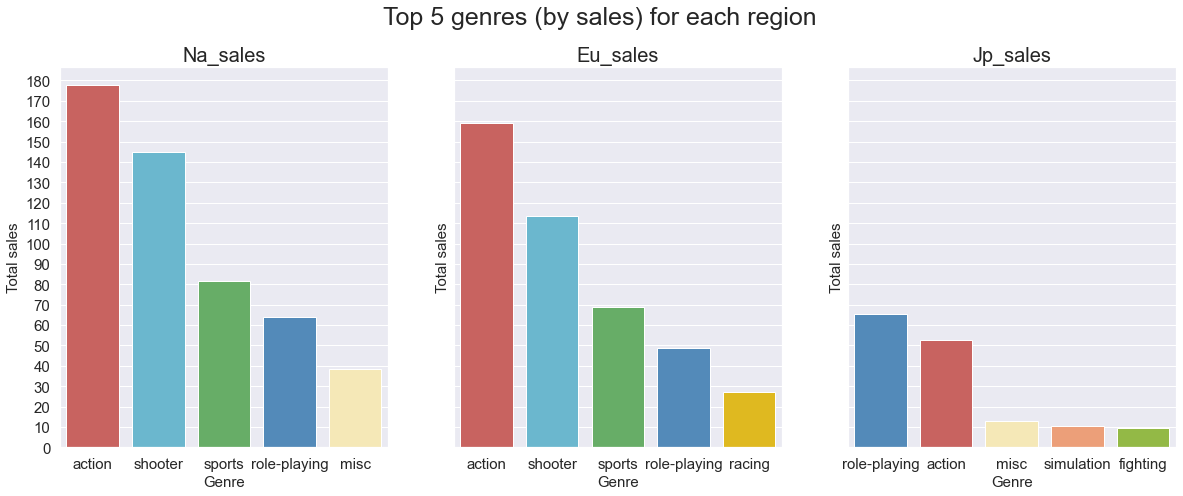

In [40]:
# rating of popular genres by region
colors = {'action': "#d9534f", 'shooter': "#5bc0de", 'sports': "#5cb85c", 'role-playing':'#428bca', 
          'misc':'#ffeead', 'racing':'#ffcc00', 'simulation':'#ff9966', 'fighting':'#99cc33'}
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 7), sharey=True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Top 5 genres (by sales) for each region', fontsize=25, y=1)
for name, ax in zip(data.columns[4:7], axs.ravel()):
    sns.barplot(data=data.pivot_table(index='genre', values=name, aggfunc='sum')
                .reset_index()
                .sort_values(by=name, ascending=False)
                .head(), 
                    x='genre', y=name, ax=ax, palette=colors)
    ax.set_title(name.capitalize(), fontsize=20)
    ax.set_xlabel('Genre', fontsize=15)
    ax.set_yticks(np.arange(0, 190, 10))
    ax.set_ylabel('Total sales', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

*Conclusions:*
- the Japanese market again differs from other regions - the appearance of Simulation and Fighting genres, the absence of the popular in other regions Shooter;
- in Japan, the first two places (Role-playing and Action) are almost equally popular, the other genres lag significantly;
- America and Europe have a similar rating: only the 5th place differs (America - multi-genre games, Europe - Racing);

In [41]:
# rating of popular (highest sales) genres by region (ratio)
for name in data.columns[4:7]:
    print(f'\n\033[0;37;40m_____________{name.upper()} GENRE SALES RATIO_____________\033[0;0m\n')
    display(data.groupby('genre')[name]
            .sum()
            .rename('ratio')
            .transform(lambda x:x/x.sum()*100)
            .reset_index()
            .sort_values(by='ratio', ascending=False)
            .head(5))


_____________NA_SALES GENRE SALES RATIO_____________



,genre,ratio
0,action,30.09
8,shooter,24.50
10,sports,13.80
7,role-playing,10.83
3,misc,6.46



_____________EU_SALES GENRE SALES RATIO_____________



,genre,ratio
0,action,31.44
8,shooter,22.39
10,sports,13.63
7,role-playing,9.58
6,racing,5.38



_____________JP_SALES GENRE SALES RATIO_____________



,genre,ratio
7,role-playing,33.98
0,action,27.42
3,misc,6.68
9,simulation,5.41
2,fighting,4.90


*Conclusions:*
- the two most popular genres in all regions are almost equally successful in sales (no more than 10% of the difference) and account for more than 50% of the total amount of sales;

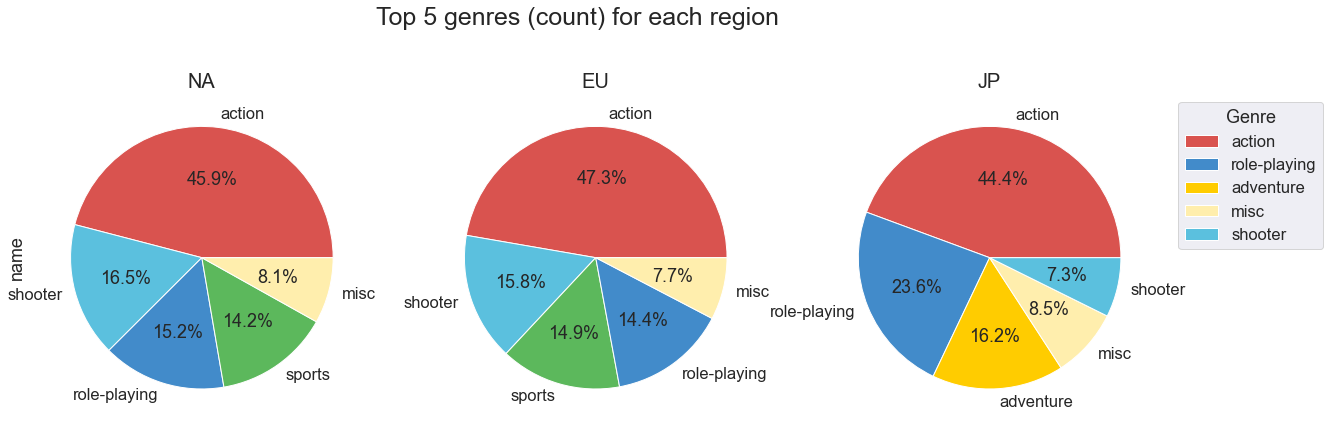

In [42]:
# games released ratio for each genre
cdict = {'action': "#d9534f", 'shooter': "#5bc0de", 'sports': "#5cb85c", 'role-playing':'#428bca', 
          'misc':'#ffeead', 'adventure':'#ffcc00'}
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 7), sharey=True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Top 5 genres (count) for each region', fontsize=25, y=1)
for name, ax in zip(data.columns[4:7], axs.ravel()):
    filter_data = data[data[name] != 0]
    pie_data = filter_data.pivot_table(index='genre', values='name', aggfunc='count').reset_index().sort_values(by='name', ascending=False).head()
    colors = [cdict[x] for x in pie_data['genre']]
    pie_data.plot.pie(y='name', labels=pie_data['genre'], ax=ax, colors=colors, autopct='%1.1f%%')
    ax.set_title(name.upper()[:2], fontsize=20)
    ax.get_legend().remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Genre')
plt.show()

*Conclusions: action dominates significantly in all regions, partly because of its highest sales numbers.*
- NA: shooters, role-playing and sports genres have equal ratio, but shooter is successful by 65 million copies.
- EU: shooters, role-playing and sports genres have equal ratio, but the shooter is successful by 45 million copies. 5th place is occupied by multi-genre games which sell badly (their place in sales takes Racing);
- JP: the role-playing game is so successful that the fact of having less games released than action, surpasses it in sales (by 15 million copies); simulation and fighting, which rank 4-5 in sales, are not present in this rating, instead of them in 16.2% unpopular adventure and shooters (7.3%) released;

## ESRB and sales

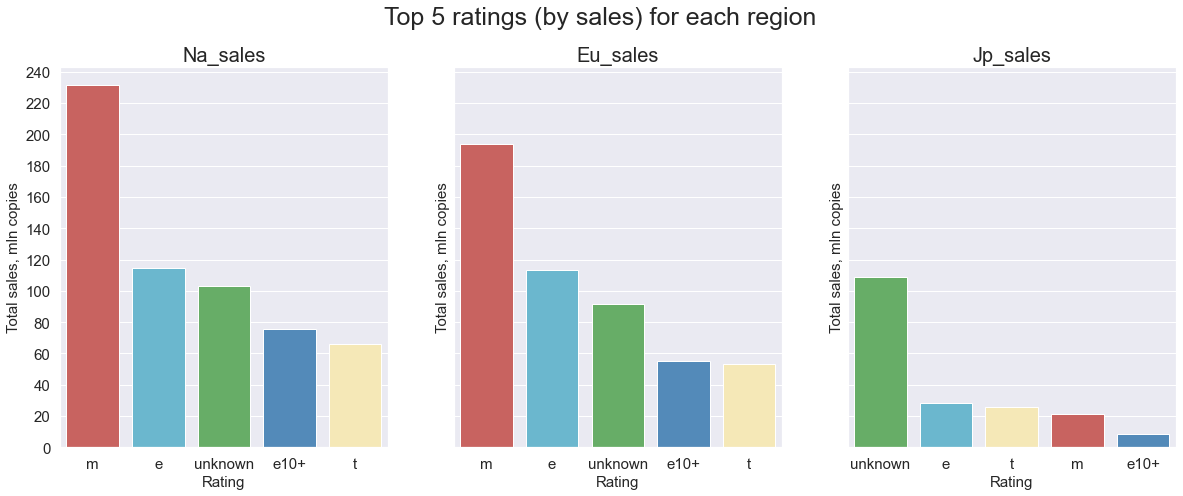

In [43]:
# most popular ratings by region
colors = {'m': "#d9534f", 'e': "#5bc0de", 'unknown': "#5cb85c", 'e10+':'#428bca', 't':'#ffeead'}
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 7), sharey=True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Top 5 ratings (by sales) for each region', fontsize=25, y=1)
for name, ax in zip(data.columns[4:7], axs.ravel()):
    sns.barplot(data=data.pivot_table(index='rating', values=name, aggfunc='sum')
                .reset_index()
                .sort_values(by=name, ascending=False)
                .head(), 
                    x='rating', y=name, ax=ax, palette=colors)
    ax.set_title(name.capitalize(), fontsize=20)
    ax.set_xlabel('Rating', fontsize=15)
    ax.set_yticks(np.arange(0, 250, 20))
    ax.set_ylabel('Total sales, mln copies', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

*Conclusions:*
- the same ranking is observed for NA and EU; by a large margin, leads M - mature games;
- Japan has a different rating - mature genre is only 4th;
- in Japan, the first place takes "unknown". It can be assumed that in this region many games are assessed by different organizations;
- games with "unknown" rating in NA and EU take third place - i.e. some manufacturers do not use the ESRB services for their products; 
- E (for everyone) is second for all regions.

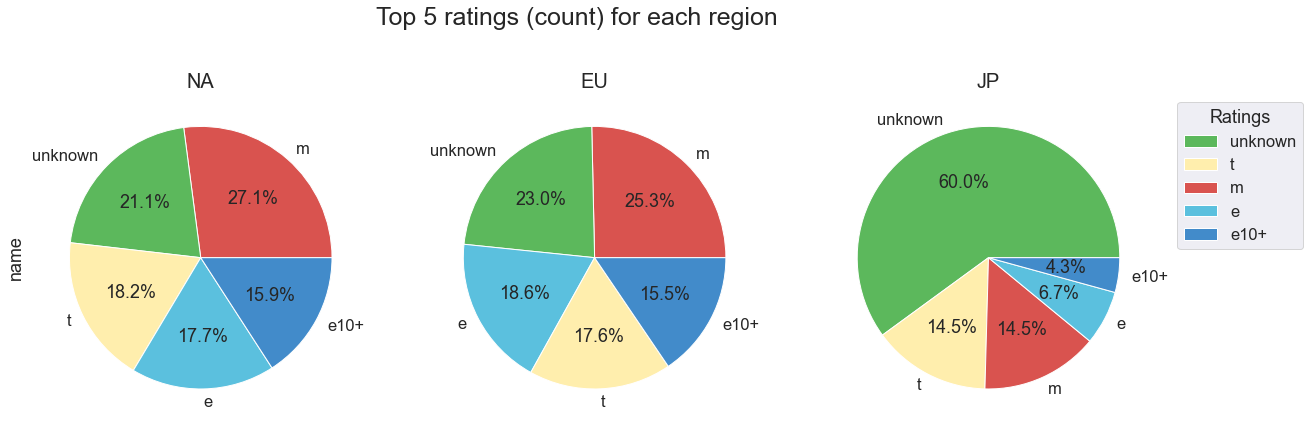

In [44]:
# games ratio by rating
cdict = {'m': "#d9534f", 'e': "#5bc0de", 'unknown': "#5cb85c", 'e10+':'#428bca', 't':'#ffeead'}
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 7), sharey=True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Top 5 ratings (count) for each region', fontsize=25, y=1)
for name, ax in zip(data.columns[4:7], axs.ravel()):
    filter_data = data[data[name] != 0]
    pie_data = filter_data.pivot_table(index='rating', values='name', aggfunc='count').reset_index().sort_values(by='name', ascending=False).head()
    colors = [cdict[x] for x in pie_data['rating']]
    pie_data.plot.pie(y='name', labels=pie_data['rating'], ax=ax, colors=colors, autopct='%1.1f%%')
    ax.set_title(name.upper()[:2], fontsize=20)
    ax.get_legend().remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Ratings')
plt.show()

*Conclusions:*
- top 5 is almost the same in America and Europe, Japan is dominated by games without rating (60%);
- NA, EU: mature rating is really more successful in these regions (a break from the nearest competitor E (for everyone) is  70mln. copies for Europe and 113mln. copies for America);
- JP: the success of games with an unknown rating is largely due to their number (60% of the total), noting some success of rating E - second place in sales with 6.7% of the total released games.

Let's express the correlation between rating and sales as a number, but before we will transform rating category into numerical representation:

In [45]:
# correlation matrices for each region
for name in data.columns[4:7]:
    data_code = data[data[name] != 0]
    ratings_codes = pd.get_dummies(data_code[['total_sales', 'rating']], prefix='r')
    print(f'\n\033[0;37;40m_____________{name.upper()[:2]} REGION_____________\033[0;0m\n')
    print(f'\n\033[0;37;40mRating and sales correlation (pearson)\033[0;0m\n')
    display(ratings_codes.corr()[:1])
    print(f'\n\033[0;37;40mRating and sales correlation (spearman)\033[0;0m\n')
    display(ratings_codes.corr(method='spearman')[:1])


_____________NA REGION_____________


Rating and sales correlation (pearson)



,total_sales,r_e,r_e10+,r_m,r_t,r_unknown
total_sales,1.00,0.04,-0.06,0.12,-0.09,-0.03



Rating and sales correlation (spearman)



,total_sales,r_e,r_e10+,r_m,r_t,r_unknown
total_sales,1.00,0.05,0.02,0.14,-0.10,-0.11



_____________EU REGION_____________


Rating and sales correlation (pearson)



,total_sales,r_e,r_e10+,r_m,r_t,r_unknown
total_sales,1.00,0.02,-0.06,0.14,-0.08,-0.05



Rating and sales correlation (spearman)



,total_sales,r_e,r_e10+,r_m,r_t,r_unknown
total_sales,1.00,-0.01,0.04,0.18,-0.05,-0.17



_____________JP REGION_____________


Rating and sales correlation (pearson)



,total_sales,r_e,r_e10+,r_m,r_t,r_unknown
total_sales,1.00,0.19,0.02,0.27,-0.04,-0.27



Rating and sales correlation (spearman)



,total_sales,r_e,r_e10+,r_m,r_t,r_unknown
total_sales,1.00,0.28,0.16,0.38,0.13,-0.58


*Conclusions: Pearson’s linear correlation coefficient does not show the relationship between sales and ratings. Spearman’s rank correlation coefficient (only in JP) shows an average negative correlation between sales and "unknown" rating (-0.58) and a weak positive correlation between sales and Mature rating. However, in general, we conclude that sales do not depend on the rating.*

## Interim counclusions
*Platform analysis:*
- platforms top 1: NA - XBOX, EU - PS4, JP - 3DS;
- the ratings of America and Europe are similar, and the rating of Japan is very different: there are PSV and Wii U platforms, and 3DS ranks first;
- America leads in overall sales, followed by Europe and Japan;
- топ 1 в Америке и Европе имеют схожие суммы продаж (около 140 млн. копий);
- leaders in NA and EU account for 23.7% and 27.8% respectively, while in Japan 3DS captures more than 45% of sales;
- in NA, there are many equally popular platforms - PS4, PS3, XONE;
- in EU, there are two most popular platforms - PS3 and PS4 - 21.08% and 27.8% of total sales respectively;
- EU: две наиболее поплуярные платформы PS3 и PS4 - 21.08% и 27.8% от всех продаж;
- JP: platforms other than 3DS are not very popular in the Japanese market;

*Games released ratio (by platform) for each region:*     

Overall, the top 5 platforms have practically equal shares among themselves for all regions.
- NA: Xbox sells on average better than its competitors;
- EU: PS4 has better sales on average; 3DS is not in the top 5 by number of games released (but has 5th place in sales). PC games, despite the released number, are not the leader of sales;
- JP: 3DS has a high popularity, occupying about 20% of the games released, it is well ahead of its competitors in terms of sales; games on the Wii U are released frequently, but they sell badly, for the PSP the situation is the opposite;


*Genre analysis:*
- the Japanese market again differs from other regions - the appearance of Simulation and Fighting genres, the absence of the popular in other regions Shooter;
- America and Europe have a similar rating: only the 5th place differs (America - multi-genre games, Europe - racing);
- the two most popular genres in all regions are almost equally successful in sales (no more than 10% of the difference) and account for more than 50% of the total amount of sales;


*Games released ratio (by genre) for each region:*     
- action dominates significantly in all regions, partly because of its highest sales numbers.
- NA: shooters, role-playing and sports genres have equal ratio, but shooter is successful by 65 million copies.
- EU: shooters, role-playing and sports genres have equal ratio, but the shooter is successful by 45 million copies. 5th place is occupied by multi-genre games which sell badly (their place in sales takes Racing);
- JP: the role-playing game is so successful that the fact of having less games released than action, surpasses it in sales (by 15 million copies); simulation and fighting, which rank 4-5 in sales, are not present in this rating, instead of them in 16.2% unpopular adventure and shooters (7.3%) released;

*ESRB and sales:*     

- the same ranking is observed for NA and EU; by a large margin, leads M - mature games;
- Japan has a different rating - mature genre is only 4th; the first place takes "unknown". It can be assumed that in this region many games are assessed by different organizations;
- games with no rating in NA and EU take third place - i.e. some manufacturers do not use the ESRB services for their products;
- E (for everyone) is second for all regions.

*Games released ratio (by rating) for each region:*  
- top 5 is almost the same in America and Europe, Japan is dominated by games without rating (60%);
- NA, EU: mature rating is really more successful in these regions (a break from the nearest competitor E (for everyone) is 70mln. copies for Europe and 113mln. copies for America);
- JP: the success of games with an unknown rating is largely due to their number (60% of the total), noting some success of rating E - second place in sales with 6.7% of the total released games.

Pearson’s linear correlation coefficient does not show the relationship between sales and ratings. Spearman’s rank correlation coefficient (only in JP) shows an average negative correlation between sales and "unknown" rating (-0.58) and a weak positive correlation between sales and Mature rating. However, in general, we conclude that sales do not depend on the rating.

# Hypothesis testing

At this stage we will test two hypotheses:
- average user ratings for Xbox One and PC platforms are the same;
- average user ratings of Action and Sports genres are different;

## Xbox One and PC ratings
The null hypothesis **H0** (should have an equal sign): the average user ratings of the Xbox One and PC platforms are the same.    
The alternative hypothesis **H1**: the average user ratings of the Xbox One and PC platforms differ.         

THe significance level is 0.05 (5%).

In [46]:
# select platforms in separate variables
xbox = data[data['platform'] == 'x360'].dropna(subset=['user_score'])
pc = data[data['platform'] == 'pc'].dropna(subset=['user_score'])

In [47]:
# user score statistics
print('\n\033[0;37;40m_____________XBOX PLATFORM_____________\033[0;0m\n', 
      xbox['user_score'].describe().loc[['mean', 'std']])
print('Variance:', round(np.var( xbox['user_score'], ddof=1), 2))
print('\n\033[0;37;40m_____________PC PLATFORM_____________\033[0;0m\n', 
      pc['user_score'].describe().loc[['mean', 'std']])
print('Variance:', round(np.var( pc['user_score'], ddof=1), 2))


_____________XBOX PLATFORM_____________
 mean   6.22
std    1.58
Name: user_score, dtype: float64
Variance: 2.49

_____________PC PLATFORM_____________
 mean   6.43
std    1.66
Name: user_score, dtype: float64
Variance: 2.77


*Conclusion: the mean and standard deviation are somewhat different.*

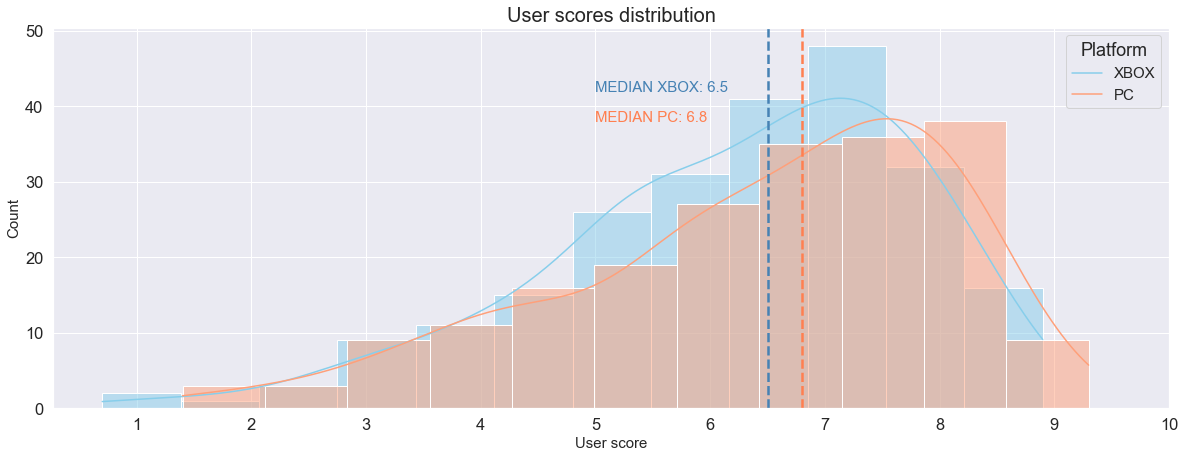

In [48]:
# histogram
plt.figure(figsize=(20, 7))
sns.histplot(data=xbox, x='user_score', kde=True, color='skyblue')
sns.histplot(data=pc, x='user_score', kde=True, color='lightsalmon')
plt.title('User scores distribution', fontsize=20)
plt.xlabel('User score', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(np.arange(1, 11, 1))
plt.legend(title='Platform', labels=['XBOX', 'PC'], fontsize=15)
plt.axvline(x=xbox['user_score'].median(), color='steelblue', ls='--', lw=2.5)
plt.axvline(x=pc['user_score'].median(), color='coral', ls='--', lw=2.5)
plt.text(5, 42, f'MEDIAN XBOX: {xbox["user_score"].median()}', c='steelblue', fontsize=15)
plt.text(5, 38, f'MEDIAN PC: {pc["user_score"].median()}', c='coral', fontsize=15);

*Conclusions: distribution close to normal, median changes slightly.*

In [49]:
# number of games for each platform
print('Number of games, platform Xbox:', len(xbox))
print('Number of games, platform PC:', len(pc))

Number of games, platform Xbox: 235
Number of games, platform PC: 206


In [50]:
# hypothesis testing
alpha = .05
results = st.ttest_ind(xbox['user_score'], pc['user_score'])
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

p-value: 0.17951812027167968
We fail to reject the null hypothesis


*Conclusion: we accept **H0** - the average user ratings of the Xbox One and PC platforms are the same.*

## Action and Sports ratings
The null hypothesis H0 (should have an equal sign): the average user ratings of the action and sports genres are the same.
The alternative hypothesis H1: the average user ratings of the action and sports genres differ.

The significance level is 0.05 (5%).

In [51]:
# select genres in the separate variables
action = data[data['genre'] == 'action'].dropna(subset=['user_score'])
sports = data[data['genre'] == 'sports'].dropna(subset=['user_score'])

In [52]:
# statistics
print('\n\033[0;37;40m_____________GENRE ACTION_____________\033[0;0m\n', action['user_score'].describe().loc[['mean', 'std']])
print('Variance:', round(np.var(action['user_score'], ddof=1), 2))
print('\n\033[0;37;40m_____________GENRE SPORTS_____________\033[0;0m\n', sports['user_score'].describe().loc[['mean', 'std']])
print('Variance:', round(np.var(sports['user_score'], ddof=1), 2))


_____________GENRE ACTION_____________
 mean   6.83
std    1.37
Name: user_score, dtype: float64
Variance: 1.89

_____________GENRE SPORTS_____________
 mean   5.46
std    1.74
Name: user_score, dtype: float64
Variance: 3.02


*Conclusion: there are differences between averages and standard deviations.*

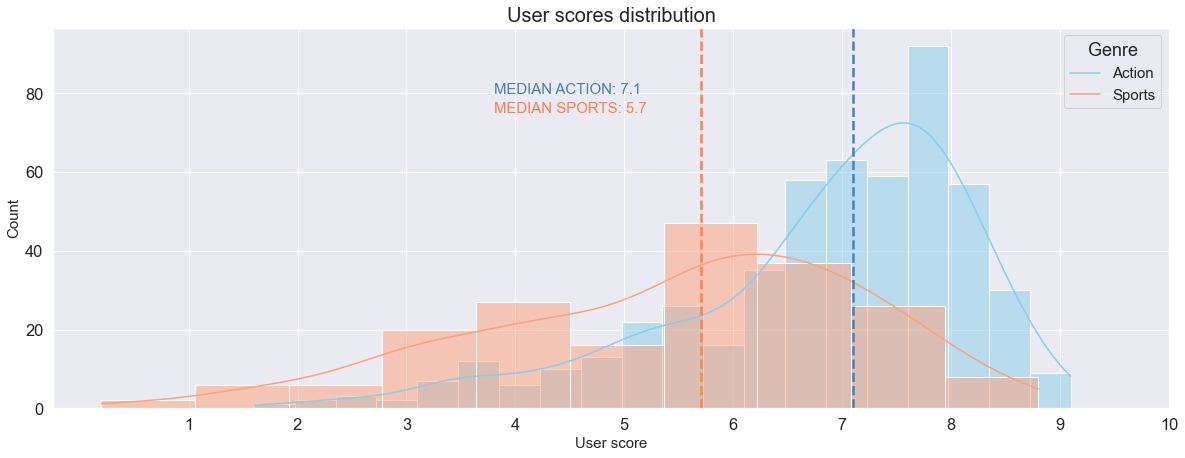

In [53]:
# histogram
plt.figure(figsize=(20, 7))
sns.histplot(data=action, x='user_score', kde=True, color='skyblue')
sns.histplot(data=sports, x='user_score', kde=True, color='lightsalmon')
plt.title('User scores distribution', fontsize=20)
plt.xlabel('User score', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(np.arange(1, 11, 1))
plt.legend(title='Genre', labels=['Action', 'Sports'], fontsize=15)
plt.axvline(x=action['user_score'].median(), color='steelblue', ls='--', lw=2.5)
plt.axvline(x=sports['user_score'].median(), color='coral', ls='--', lw=2.5)
plt.text(3.8, 80, f'MEDIAN ACTION: {action["user_score"].median()}', c='steelblue', fontsize=15)
plt.text(3.8, 75, f'MEDIAN SPORTS: {sports["user_score"].median()}', c='coral', fontsize=15);

*Conclusion: distribution close to normal, median differ.*

In [54]:
# number of games for each genre
print('Number of games, genre Action:', len(action))
print('Number of games, genre Sports:', len(sports))

Number of games, genre Action: 523
Number of games, genre Sports: 195


The number of observations for the two samples differs considerably. Let’s set the parameter `equal_var=False`.

In [55]:
# hypothesis testing
alpha = .05
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

p-value: 4.24307776572644e-20
We reject the null hypohesis


*Conslusion: we accept H1 - the average user ratings of the action and sports genres differ.* 

## Interim conslusions

*Xbox One and PC ratings* 

According to the charts: the mean (6.22 and 6.43) and the standard deviation are slightly different, the distribution is close to normal, the median is slightly different (6.5 and 6.8).    
According to the two-sided testing we accept H0: the average user ratings of the Xbox One and PC platforms are the same (significance level - 5%).


*Action and Sports ratings*

According to the charts: the mean (6.8 and 5.4) and standard deviation are quite different, the distribution is close to normal, the median differs (7.1 and 5.7). The number of observations for the two samples is very different as well (523 for the Action and 193 for Sports).
According the two-sided testing we accept H1: the average user ratings of the action and sports genres differ (significance level - 5%).

# General conclusion

<div style="border:solid green 2px; padding: 20px">
    
In this project we worked for the online store Ice, which sells video games all over the world. We identified successful game patterns that will allow us to leverage a potentially popular product and plan advertising campaigns. We used the data up to 2016, and we made a forecast for 2017.    
    
We analyzed 16,715 records from 1980 to 2016. Brief data description:
- unique platforms - 31 (most popular is PS2 - 2161 records); unique genres - 12 (most popular is Action - 3369 records); unique ratings - 8 (most popular - E () (3990 records);
- average critics' score is 68/100;
- *average* sales are highest in NA (0.26 million), followed by Europe (0.14 million) and Japan (0.07 million);
- missing values in the following columns (deleted):
    - `Name` - 0.01%;
    - `Year_of_Release` - 1.61%;
    - `Genre` - 0.01%;
- missing values in the following columns (unchanged):
    - `Critic_Score` - 51.32%;
    - `User_Score` - 54.62% (including tbd);
- missing values in the following columns (replaced with "unknown"):
    - `Rating` - 40.48%;

**Data preprocessing:**
- column headings editing according to the naming convention in Python;
- missing values processing (see above);
- data types transformation: year_of_release to int, user_score to float;
- duplicates processing (lowercase transformation);
-  categorical data processing: unique values check (rating, genres and platforms); features distributions:
    - most popular consoles are: PlayStation (about 35% of games), Nintendo DS, Wii, Xbox;
    - most popular genres are: Action, Sports, Role-playing, quite a lot of multigenre games (Misc from miscellaneous) - 10.5%;
    - ratings: E (everyone) (40% of data), T(29.7%) - teen, M(15.7%) - mature;
- distributions for numerical data:
    - most of the games released in 2003-2010;
    - outliers in sales are due to high zero values as well as bestsellers; some games are not sold in all regions;
    - lower and upper quartile critical scores range from 60 to 80 points (this is above average), there are outliers to the left of the boxplot;
    - lower and upper quartile users scores range from 6.4 to 8.2 points (even better than the critics' scores), there are outliers to the left of the boxplot as well;

**Exploratory Data Analysis (EDA)**

*General analysis:*
- the number of games released has been rising since the 1990s. In 1995 it exceeded 200 games per year. The peak falls on the period of 2006 - 2011. After that it sharply falls to approx. 600 games per year;
- sales leaders are: ps2, x360, ps3, wii, ds, ps;
- «lifetime» of the platform is about 7-10 years;
- PS2 has the highest sales success of its period;

*Actual period (2012-2016), sales forecasting:*
- sales leaders are 3 и 4 Playstation, X360, 3DS and Xone;
- given the «lifetime» and sales dynamics, the potential profitable platforms are: PS4, Xone, 3DS (sales are declining but still quite high), perhaps PC (possible sales growth due to the global slowdown in the platform market);
- to the potentially profitable platforms, we are adding Wii U for its stability and its relatively short "lifetime" (released at the end of 2012). Its sales may increase;

*User and critical reception:*
- overall, sales are not highly dependent on user scores. An exception is the 3DS platform: we observe strong relationship between scores and sales. The weakest correlation can be observed for PS4 - games with 3-6 score can have successful sales numbers;
- correlation between critical scores and sales can be observed for all game platforms. Note that only a few 3DS games scored 80 points or more (compared to previous platforms) and games with scores above 90 for the PS4 were very successful;
- Pearson's correlation coefficient shows a strong correlation between critics' and users' scores (over 0.5 for all platforms, 0.7 for 3DS), a weak correlation between critics' scores (0.4 for PS4 and 0.3 for the rest platforms) and sales and a no correlation (0.1 and less) between user scores and sales;
- Spearman’s rank correlation coefficient shows a close correlation (0.5-0.6) between critics' scores and sales for all platforms except 3DS (0.4), no relationship (less than 0.2) between users' scores and sales, and a strong correlation between users' and critics' scores (0.4-0.5, 0.8 for 3DS);

*Genres analysis:*  
- Action is only successful at the expense of bestsellers, median is equal to the non-profitable genres. The same can be said about Role-playing genre;
- stable profit performance have Sports and Platform genres (Platform is at the bottom of the list in terms of overall profitability and popularity, this genre lacks bestsellers);
- Adventure is one of the most unprofitable genres, along with Puzzle;
- Shooter has the best performance: the highest median, wide IQR and it has games bestsellers;

**User profile analysis for each region**  
    
*North America*                   
Region with plenty of popular platforms. The best selling is XBOX (140 mln. copies, 23.7% of the total number of copies). The following are PS4, PS3, XONE (similar popularity level).         
The most popular genre is Action (both in terms of the number of copies sold and the number of games released). Shooter is an extremely successful genre (shooters, role-playing and sports genres have equal ratio, but shooter is successful by 65 million copies sold).
The best selling rating is mature. A break from the nearest competitor E (everyone) is 113mn. copies, equally in the amount of games released. Games with unknown rating take third place - i.e. quite a lot of manufacturers do not use the services of the ESRB for their products.

*Europe*     
The best selling platforms are PS4 (140 million copies, 27.8% of the total number of copies) and PS3 21.08% of the total. Games on the PC are not very successful: ranked 20% by number, but are not in the top 5 sales (in place of them is Nintendo).     
The patterns in Europe are similar to those in the United States. Slightly better sells Racing genre - it is not in the top 5 in the number of games, but ranks 5th in the sales ranking.
All statements about the rating in America are true for the European region.  
    
*Japan*     
The gaming industry in this region is differs very much in all parameters (genres, ratings, platforms). The best selling is 3DS platform (90 million copies, more than 45% of the total number copies), in the sales ranking there are PSV, Wii U, which are not in the top of other regions, but Nintendo leaves its competitors behind (despite the fact that it occupies only 20% of the number of games released).        
In this area are popular Simulation, and Fighting genres, but the popular in the EU and US Shooter is gone. However, the number of unpopular shooters and adventure games is higher. First place takes Role-playing genre: it is so successful that having fewer games released than Action, it outperforms it in sales (the difference is approx. 15 million copies).   
There are many games without rating - about 60%. There is a local CERO rating system, presumably this is the reason for the large number of games without ESRB rating. The popularity of these games is largely due to their number (60% of the total), note some success of E rating - it takes the second place in sales with 6.7% of the total number of released games. The most popular genre for the rest regions 'mature' is only 4th in the Japanese market.   
    
Pearson’s linear correlation coefficient does not show the relationship between sales and ratings. Spearman’s rank correlation coefficient (only in JP) shows an average negative correlation between sales and "unknown" rating (-0.58) and a weak positive correlation between sales and Mature rating. However, in general, we conclude that sales do not depend on the rating.
    
**Hypothesis testing**
    
*Xbox One and PC ratings* 

According to the charts: the mean (6.22 and 6.43) and the standard deviation are slightly different, the distribution is close to normal, the median is slightly different (6.5 and 6.8).    
According to the two-sided testing we accept H0: the average user ratings of the Xbox One and PC platforms are the same (significance level - 5%).

*Action and Sports ratings*

According to the charts: the mean (6.8 and 5.4) and standard deviation are quite different, the distribution is close to normal, the median differs (7.1 and 5.7). The number of observations for the two samples is very different as well (523 for the Action and 193 for Sports).
According the two-sided testing we accept H1: the average user ratings of the action and sports genres differ (significance level - 5%).